<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 50px;
  font-style: normal;
  background: linear-gradient(to right, #f6f5f2, #e8f0ef);
  letter-spacing: 3px;
  color: #fddf1c;
  border-radius: 10px;
  text-align: center;
  line-height: 1.2;
  padding: 20px 10px;
">
  ⚖️ <span>Storytelling with Data:</span><br>
  <span style="color: #f67738;"> Who Earns What? Gender 🧍‍♂️🧍‍♀️ Pay Realities on Glassdoor</span>
</h1>


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right, #f6f5f2, #e8f0ef);
  letter-spacing: 3px;
  color: #47467b;
  border-radius: 10px;
  text-align: left;
  line-height: 1;
  padding: 5px 5px;
">
  <span>Introduction of the Dataset</span>
</h1>


<div style="
  font-family: 'Americana XBdCn BT' ;
  background: #f6f5f2;
  border-left: 8px solid #47467b;
  padding: 20px;
  margin: 20px auto;
  width: 95%;
  color: #333;
  font-size: 15px;
  border-radius: 10px;
  box-shadow: 2px 2px 10px rgba(0,0,0,0.05);
">
  <strong style="font-size: 25px; color: #47467b;">Context: 🧠</strong><br><br>
  The dataset has been sourced from <strong>Glassdoor</strong> and focuses on reported <strong>income data across various job titles</strong> segmented by <strong>gender</strong>.<br><br>
  Numerous studies have shown that <strong>women are often paid less than men</strong> for doing the same job.<br><br>
  This dataset enables a deeper exploration into the <strong>extent and patterns</strong> of the <strong>gender-based pay gap</strong> across different roles and industries.
</div>


<div style="
  font-family: 'Americana XBdCn BT';
  background: #f6f5f2;
  border-left: 8px solid #47467b;
  padding: 20px;
  margin: 20px auto;
  width: 95%;
  color: #333;
  font-size: 15px;
  border-radius: 10px;
  box-shadow: 2px 2px 10px rgba(0,0,0,0.05);
">
  <strong style="font-size: 25px; color: #47467b;">Attribute Information:</strong><br><br>
    
  1) <strong>Job Title</strong>: The employee’s role or designation in the company.<br>
    
  2) <strong>Gender</strong>: "Male", "Female", or "Other".<br>
  
  3) <strong>Age</strong>: Age of the employee in years.<br>
  
  4) <strong>PerfEval</strong>: Employee’s performance evaluation score or category.<br>
  
  5) <strong>Education</strong>: Highest education level attained (e.g., Bachelor's, Master's, PhD).<br>
  
  6) <strong>Dept</strong>: The department the employee belongs to (e.g., HR, IT, Finance).<br>
  
  7) <strong>Seniority</strong>: Rank or level indicating position in organizational hierarchy.<br>
  
  8) <strong>Base Pay</strong>: Annual fixed salary before bonuses.<br>
  
  9) <strong>Bonus</strong>: Additional variable compensation based on performance or other criteria.
</div>


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right, #f6f5f2, #e8f0ef);
  letter-spacing: 3px;
  color: #47467b;
  border-radius: 10px;
  text-align: left;
  line-height: 1;
  padding: 5px 5px;
">
  <span>Let's start with the dataset.. Shall we....</span>
</h1>


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle
from matplotlib.transforms import Bbox
from matplotlib.patches import Rectangle
import matplotlib.ticker as mticker
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Glassdoor Gender Pay Gap.csv")

In [4]:
df.shape

(1000, 9)

In [5]:
df.head()

JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319

In [6]:
df.JobTitle.value_counts()

JobTitle
Marketing Associate    118
Software Engineer      109
Data Scientist         107
Financial Analyst      107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: count, dtype: int64

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right, #f6f5f2, #e8f0ef);
  letter-spacing: 3px;
  color: #47467b;
  border-radius: 10px;
  text-align: left;
  line-height: 1;
  padding: 5px 5px;
">
  <span>Data Preprocessing also Feature Engineering</span>
</h1>


In [7]:
df['AgeGroup'] = pd.cut(df['Age'],bins=[16, 24, 34, 44, 54, 65],labels=['17-24', '25-34', '35-44', '45-54', '55-65'])

df['SeniorityLevel'] = df['Seniority'].map({1: 'Entry',2: 'Junior',3: 'Mid',4: 'Senior',5: 'Executive'})

df['PerfCategory'] = pd.cut(df['PerfEval'], bins=[0, 1, 2, 3, 4, 5], labels=['Very Low','Low', 'Medium', 'High','Very High'], include_lowest=False)

df['BonusToBasePayRatio'] = (df['Bonus'] / df['BasePay']).round(2)

In [8]:
df1 = df[df["Gender"] == "Male"]
df2 = df[df["Gender"] == "Female"]

In [59]:
# main face color
facecolor = ["#f0f6f7"]
# for male colors
background1 = ["#eff8f3"]      
colors1 = ['#fddf1c']
# ["#688F4E"]
#for female colors
background2 = ["#e6e6fa"]
colors2 = ["#f67738"]
# ["#046d77"]
#fonts 
fonts = ["Trebuchet MS","Georgia"]

# titles and texts
accent = ["#613e3b",      #brown
          "#47467b"]     #lavender

# another pair of colors that might be necessary 
lst= ['#003049', '#d62828', '#f77f00', '#fcbf49', '#eae2b7']

In [60]:
def style_axes(ax, background_color):
    for a in ax:
        a.set_facecolor(background_color)
        a.set_yticks([])
        a.set_ylabel("")
        a.set_xlabel("")
        for spine in ["top", "right", "left"],"bottom":
            a.spines[spine].set_color(background_color)
        for label in a.get_xticklabels():
            label.set_fontname(fonts[1])
            label.set_fontsize(10)
            label.set_fontweight("semibold")
            

In [61]:
def add_title1(ax, fontsize, x_vals, y, labels, colors):
    for x, text, color in zip(x_vals, labels, colors):
        ax.text(x, y, text,transform=ax.transAxes,fontsize=fontsize,color=color,fontfamily=fonts[1],fontweight="bold")
def add_title2(ax, fontsize, x_vals, y_vals, labels, colors):
    for x, y, text, color in zip(x_vals, y_vals, labels, colors):
        ax.text(x, y, text, transform=ax.transAxes,
                fontsize=fontsize, color=color,
                fontfamily=fonts[0], fontweight="bold")


In [62]:
def set_spines_color1(ax, color):
    for spine in ['bottom', 'top', 'right', 'left']:
        ax.spines[spine].set_color(color)
def set_spines_color2(ax, color):
    for spine in ['bottom', 'top', 'right', 'left']:
        ax.spines[spine].set_color(color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', length=0)


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right, #f6f5f2, #e8f0ef);
  letter-spacing: 3px;
  color: #47467b;
  border-radius: 10px;
  text-align: left;
  line-height: 1;
  padding: 5px 5px;
">
  <span>Visualization starts here...</span>
</h1>


In [63]:
df.head()

JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus AgeGroup SeniorityLevel PerfCategory  \
0          2    42363   9938    17-24         Junior    Very High   
1          5   108476  11128    17-24      Executive    Very High   
2          5    90208   9268    17-24      Executive         High   
3          4   108080  10154    17-24         Senior    Very High   
4          5    99464   9319    25-34      Executive    Very High   

   BonusToBasePayRatio  
0                 0.23  
1                 0.10  
2                 0.10  
3                 0.09  
4                 0.09

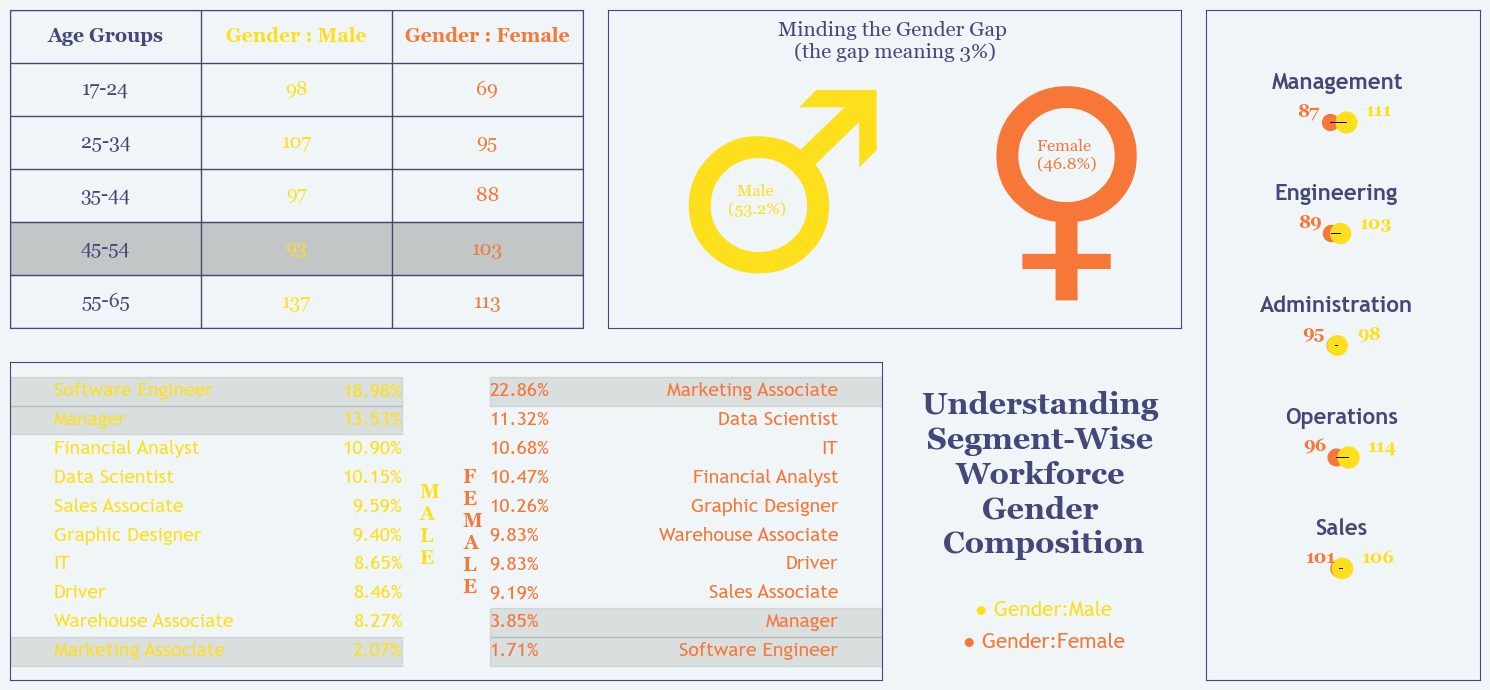

In [98]:
fig = plt.figure(figsize=(15, 7))
fig.patch.set_facecolor(facecolor[0]) 

ax = [None for _ in range(6)]
ax[0] = plt.subplot2grid((2, 5), (0, 2), colspan=2)  
ax[1] = plt.subplot2grid((2, 5), (0, 0), colspan=2)
ax[2] = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax[3] = plt.subplot2grid((2, 5), (0, 4), rowspan= 2)
ax[4] = plt.subplot2grid((2, 5), (1, 3), colspan=1)
# ------------------------------------------------------------Gender distribution plot
ax0= ax[0]
ax0.set_facecolor(facecolor[0])
ax0.set_xlim(0, 10)
ax0.set_ylim(0, 10)
# ax0.axis("off")
ax0.text(3, 4, "♂", fontsize=180, ha='center', va='center', color=colors1[0])
ax0.text(8, 4, "♀", fontsize=180, ha='center', va='center', color=colors2[0])
ax0.text(2.6, 3.6, "Male \n(53.2%)", fontsize=12, fontweight='normal', fontname=fonts[1], ha='center', color=colors1[0])
ax0.text(8, 5, "Female \n(46.8%)", fontsize=12, fontweight='normal', fontname=fonts[1], ha='center', color=colors2[0])
ax0.text(5, 8.5, "Minding the Gender Gap \n(the gap meaning 3%)", fontsize=15, fontweight='normal',ha="center", fontname=fonts[1], color=accent[1])
# ---------------------- PLOT FOR age groups ----------------------
n_rows, n_cols = 6, 3
ax1 = ax[1]
ax1.set_facecolor(facecolor[0])
ax1.set_xlim(0, n_cols)
ax1.set_ylim(0, n_rows)

for x in range(n_cols + 1):
    ax1.plot([x, x], [0, n_rows], color=accent[1], linewidth=1)
for y in range(n_rows + 1):
    ax1.plot([0, n_cols], [y, y], color=accent[1], linewidth=1)

age_groups = ['17-24', '25-34', '35-44', '45-54', '55-65']
ax1.text(0.5, 5.5, 'Age Groups', ha='center', va='center',fontsize=14, fontname=fonts[1], color=accent[1], weight='bold')
for i, group in enumerate(age_groups[::-1]):
    ax1.text(0.5, i + 0.5, group, ha='center', va='center',fontsize=14, fontname=fonts[1], color=accent[1])

genders = ['Male', 'Female']
counts = [
    [98, 107, 97, 93, 137],
    [69, 95, 88, 103, 113]
]
for col, gender, count_list, color in zip([1.5, 2.5], genders, counts, [colors1[0], colors2[0]]):
    ax1.text(col, 5.5, f'Gender : {gender}', ha='center', va='center',fontsize=14, fontname=fonts[1], color=color, weight='bold')
    for i, count in enumerate(count_list[::-1]):
        ax1.text(col, i + 0.5, str(count), ha='center', va='center',fontsize=14, fontname=fonts[1], color=color)

ax1.add_patch(Rectangle((0, 1), width=3, height=1, color="grey", alpha=0.4))

# ---------------------- job title distribution plot ----------------------
ax2 = ax[2]
ax2.set_facecolor(facecolor[0])

male_job_pct = df1['JobTitle'].value_counts(normalize=True).mul(100).sort_values(ascending=False)
female_job_pct = df2['JobTitle'].value_counts(normalize=True).mul(100).sort_values(ascending=False)

# male_max, male_min = male_job_pct.max(), male_job_pct.min()
# female_max, female_min = female_job_pct.max(), female_job_pct.min()
#male 
for i, (title, pct) in enumerate(male_job_pct.items()):
    y = len(male_job_pct) - i - 1
    font_size = 14
    ax2.text(0.45, y, f"{pct:.2f}%", fontsize=font_size, fontname=fonts[0], fontweight='medium',color=colors1[0], ha='right', va='center')
    ax2.text(0.05, y, title, fontsize=font_size, fontname=fonts[0], fontweight='medium',color=colors1[0], ha='left', va='center')
# female
for i, (title, pct) in enumerate(female_job_pct.items()):
    y = len(female_job_pct) - i - 1
    font_size = 14
    ax2.text(0.55, y, f"{pct:.2f}%", fontsize=font_size, fontname=fonts[0], fontweight='medium',color=colors2[0], ha='left', va='center')
    ax2.text(0.95, y, title, fontsize=font_size, fontname=fonts[0], fontweight='medium',color=colors2[0], ha='right', va='center')
    # ax2.text(0.5, 5,"M \nA \nL \nE ", fontsize=14, fontname=fonts[0], fontweight='medium',color=colors1[0])

highlights = [
    {'x': -0.05, 'y_vals': [len(male_job_pct) - i - 1 for i in range(2)]},{'x': 0.55, 'y_vals': [i for i in range(2)]},
    {'x': -0.05, 'y_vals': [0]},{'x': 0.55, 'y_vals': [len(female_job_pct) - 1]}]

for h in highlights:
    for y in h['y_vals']:
        ax2.add_patch(Rectangle((h['x'], y - 0.5), 0.5, 1, color='grey', alpha=0.2))

ax2.set_xlim(0, 1)
ax2.set_ylim(-1, max(len(male_job_pct), len(female_job_pct)))

# ---------------------- dept distibution plot ----------------------

ax3 = ax[3]
ax[3].set_facecolor(facecolor[0])
female_counts = df2['Dept'].value_counts()
male_counts = df1['Dept'].value_counts().reindex(female_counts.index)

y_labels = list(female_counts.index)
y_pos = list(range(len(y_labels)))

# counts on the dots
for i, dept in enumerate(y_labels):
    x_female = female_counts[dept]
    x_male = male_counts[dept]
    y = y_pos[i]
    ax3.plot([x_female, x_male], [y, y], color='black', linewidth=0.7)
    ax3.scatter(x_female, y, s=x_female * 1.5, color=colors2[0], alpha=1)
    ax3.text(x_female - 50, y + 0.05, f"{x_female}", fontdict={'font': fonts[1], 'fontsize': 13, 'weight': 'bold', 'color': colors2[0]})
    ax3.scatter(x_male, y, s=x_male * 2, color=colors1[0], alpha=1)
    ax3.text(x_male + 30, y + 0.05, f"{x_male}", fontdict={'font': fonts[1], 'fontsize': 13, 'weight': 'bold', 'color': colors1[0]})
#department names
for i, dept in enumerate(y_labels):
    x_female = female_counts[dept]
    x_male = male_counts[dept]
    x_mid = (x_female + x_male) / 2
    ax3.text(x_mid, i + 0.25, dept, fontdict={'font': fonts[0], 'fontsize': 16, 'weight': 'semibold', 'color': accent[1]},ha='center', va='bottom')

ax3.set_xlim(xmin=-100, xmax=max(male_counts.max(), female_counts.max()) + 200)
ax3.set_ylim(ymin=-1, ymax=len(y_labels))
ax3.set_yticks([])
ax3.set_xticks([])

# ---------------------- main heading ----------------------
ax4 = ax[4]
ax4.set_facecolor(facecolor[0])
ax4.text(0.5, 0.4, "Understanding \nSegment-Wise \nWorkforce \nGender \nComposition", fontsize=22,ha="center", color=accent[1], fontweight="bold", font=fonts[1])
ax4.text(0.5, 0.2, "● Gender:Male", fontsize=15, color=colors1[0], fontweight="normal", font=fonts[0],ha="center")
ax4.text(0.5, 0.1, "● Gender:Female", fontsize=15, color=colors2[0], fontweight="normal", font=fonts[0],ha="center")
ax2.text(0.47, 3,"M \nA \nL \nE ", fontsize=14, fontname=fonts[1], fontweight='bold',color=colors1[0])
ax2.text(0.52, 2,"F \nE \nM \nA \nL \nE ", fontsize=14, fontname=fonts[1], fontweight='bold',color=colors2[0])
set_spines_color2(ax0, accent[1])
set_spines_color2(ax1, accent[1])
set_spines_color2(ax2, accent[1])
set_spines_color2(ax3, accent[1])
set_spines_color2(ax4, facecolor[0])
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.tight_layout()
plt.show()


In [65]:
gender_counts = df.groupby(['Dept', 'JobTitle', 'Gender']).size().unstack(fill_value=0).reset_index()
gender_counts.columns.name = None
gender_counts = gender_counts.rename(columns={'Female': 'GenderFemale', 'Male': 'GenderMale'})
gender_counts['Total'] = gender_counts['GenderFemale'] + gender_counts['GenderMale']

dept_order = gender_counts.groupby('Dept')['Total'].sum().sort_values(ascending=False).index
gender_counts['Dept'] = pd.Categorical(gender_counts['Dept'], categories=dept_order, ordered=True)
gender_counts = gender_counts.sort_values(['Dept', 'Total'], ascending=[True, False])
gender_counts.head()

Dept             JobTitle  GenderFemale  GenderMale  Total
32  Operations    Financial Analyst            12          19     31
30  Operations       Data Scientist            11          13     24
33  Operations     Graphic Designer            13          10     23
36  Operations  Marketing Associate            19           2     21
37  Operations      Sales Associate            10          10     20

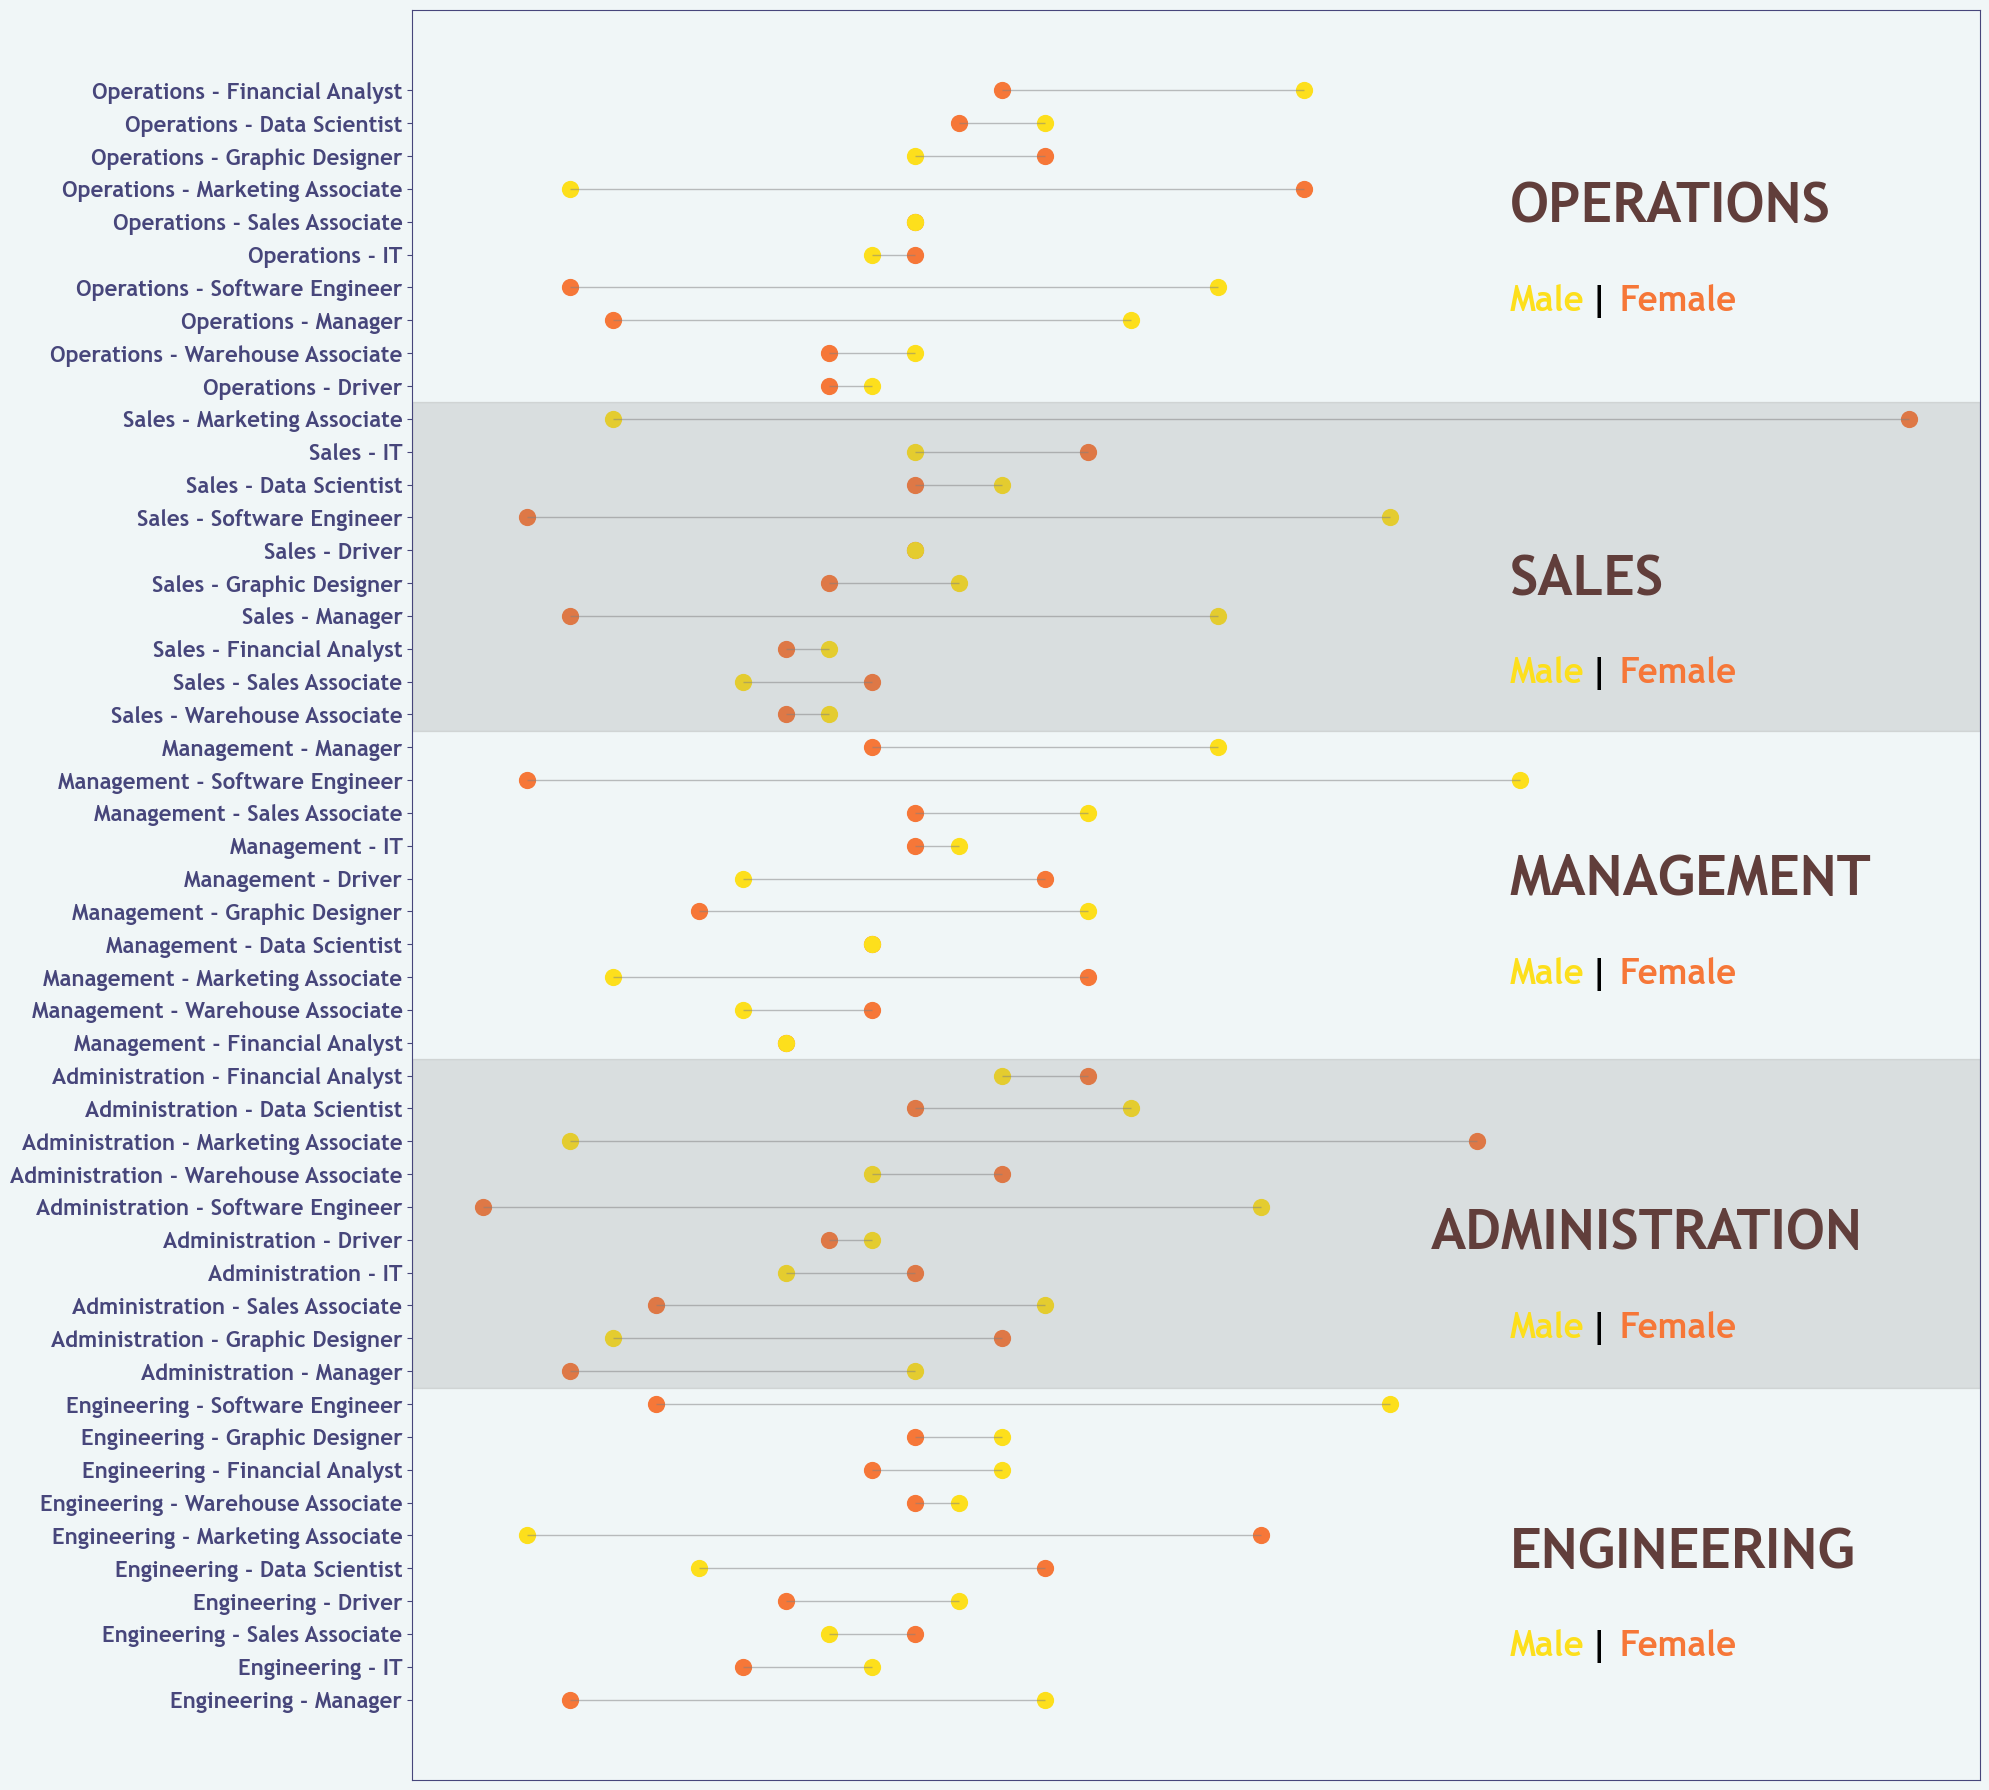

In [66]:
gender_counts["Role"] = gender_counts["Dept"].astype(str) + " - " + gender_counts["JobTitle"].astype(str)
fig, ax = plt.subplots(figsize=(20, 18), facecolor=facecolor[0],dpi=100)
fig.patch.set_facecolor(facecolor[0])
ax.set_facecolor(facecolor[0])  

ax.hlines(y=gender_counts['Role'],xmin=gender_counts['GenderFemale'],xmax=gender_counts['GenderMale'],color='grey', alpha=0.5, linewidth=1)

# Female (blue)
ax.scatter(gender_counts['GenderFemale'],gender_counts['Role'],color=colors2[0], s=130)

# Male (green)
ax.scatter(gender_counts['GenderMale'],gender_counts['Role'],color=colors1[0], s=130)

# Y-axis display as-is
ax.set_xlabel("")
ax.set_xticks([])
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=10, colors=accent[1])
ax.set_yticklabels(gender_counts['Role'], fontdict={'fontsize': 16, 'color': accent[1], 'fontname': fonts[0], 'weight': 'semibold'})
ax.invert_yaxis()

ax.set_title("",fontsize=14, color=accent[0], pad=20)
set_spines_color1(ax, accent[1])
ops_range = gender_counts[gender_counts["Dept"] == "Operations"].index
eng_range = gender_counts[gender_counts["Dept"] == "Engineering"].index
ax.axhspan(ops_range.min() - 0.5, ops_range.max() + 0.5, color='grey', alpha=0.2)
ax.axhspan(eng_range.min() - 0.5, eng_range.max() + 0.5, color='grey', alpha=0.2)
add_title2(ax=ax, fontsize=40, x_vals=[0.7,0.7,0.7,0.65,0.7], y_vals=[0.88,0.67,0.5,0.3,0.12],
                  labels=["OPERATIONS", "SALES", "MANAGEMENT", "ADMINISTRATION", "ENGINEERING"],
                  colors=[accent[0],accent[0],accent[0],accent[0],accent[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.83, 0.83, 0.83],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.62, 0.62, 0.62],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.45, 0.45, 0.45],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.25, 0.25, 0.25],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.07, 0.07, 0.07],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
plt.tight_layout()
plt.show()


In [67]:
gender_count = df.groupby(['SeniorityLevel', 'JobTitle', 'Gender']).size().unstack(fill_value=0).reset_index()
gender_count.columns.name = None
gender_count = gender_count.rename(columns={'Female': 'GenderFemale', 'Male': 'GenderMale'})
gender_count["Total"] = gender_count["GenderFemale"] + gender_count["GenderMale"]
seniority_order = pd.CategoricalDtype(categories=["Executive","Senior","Mid", "Junior","Entry"], ordered=True)
gender_count["SeniorityLevel"] = gender_count["SeniorityLevel"].astype(seniority_order)
gender_count = gender_count.sort_values(by=["SeniorityLevel", "Total"], ascending=[True, False]).reset_index(drop=True)
gender_count = gender_count[["SeniorityLevel", "JobTitle", "GenderFemale", "GenderMale", "Total"]]
gender_count.head()
gender_count["Role"] = gender_count["SeniorityLevel"].astype(str) + " - " + gender_count["JobTitle"].astype(str)

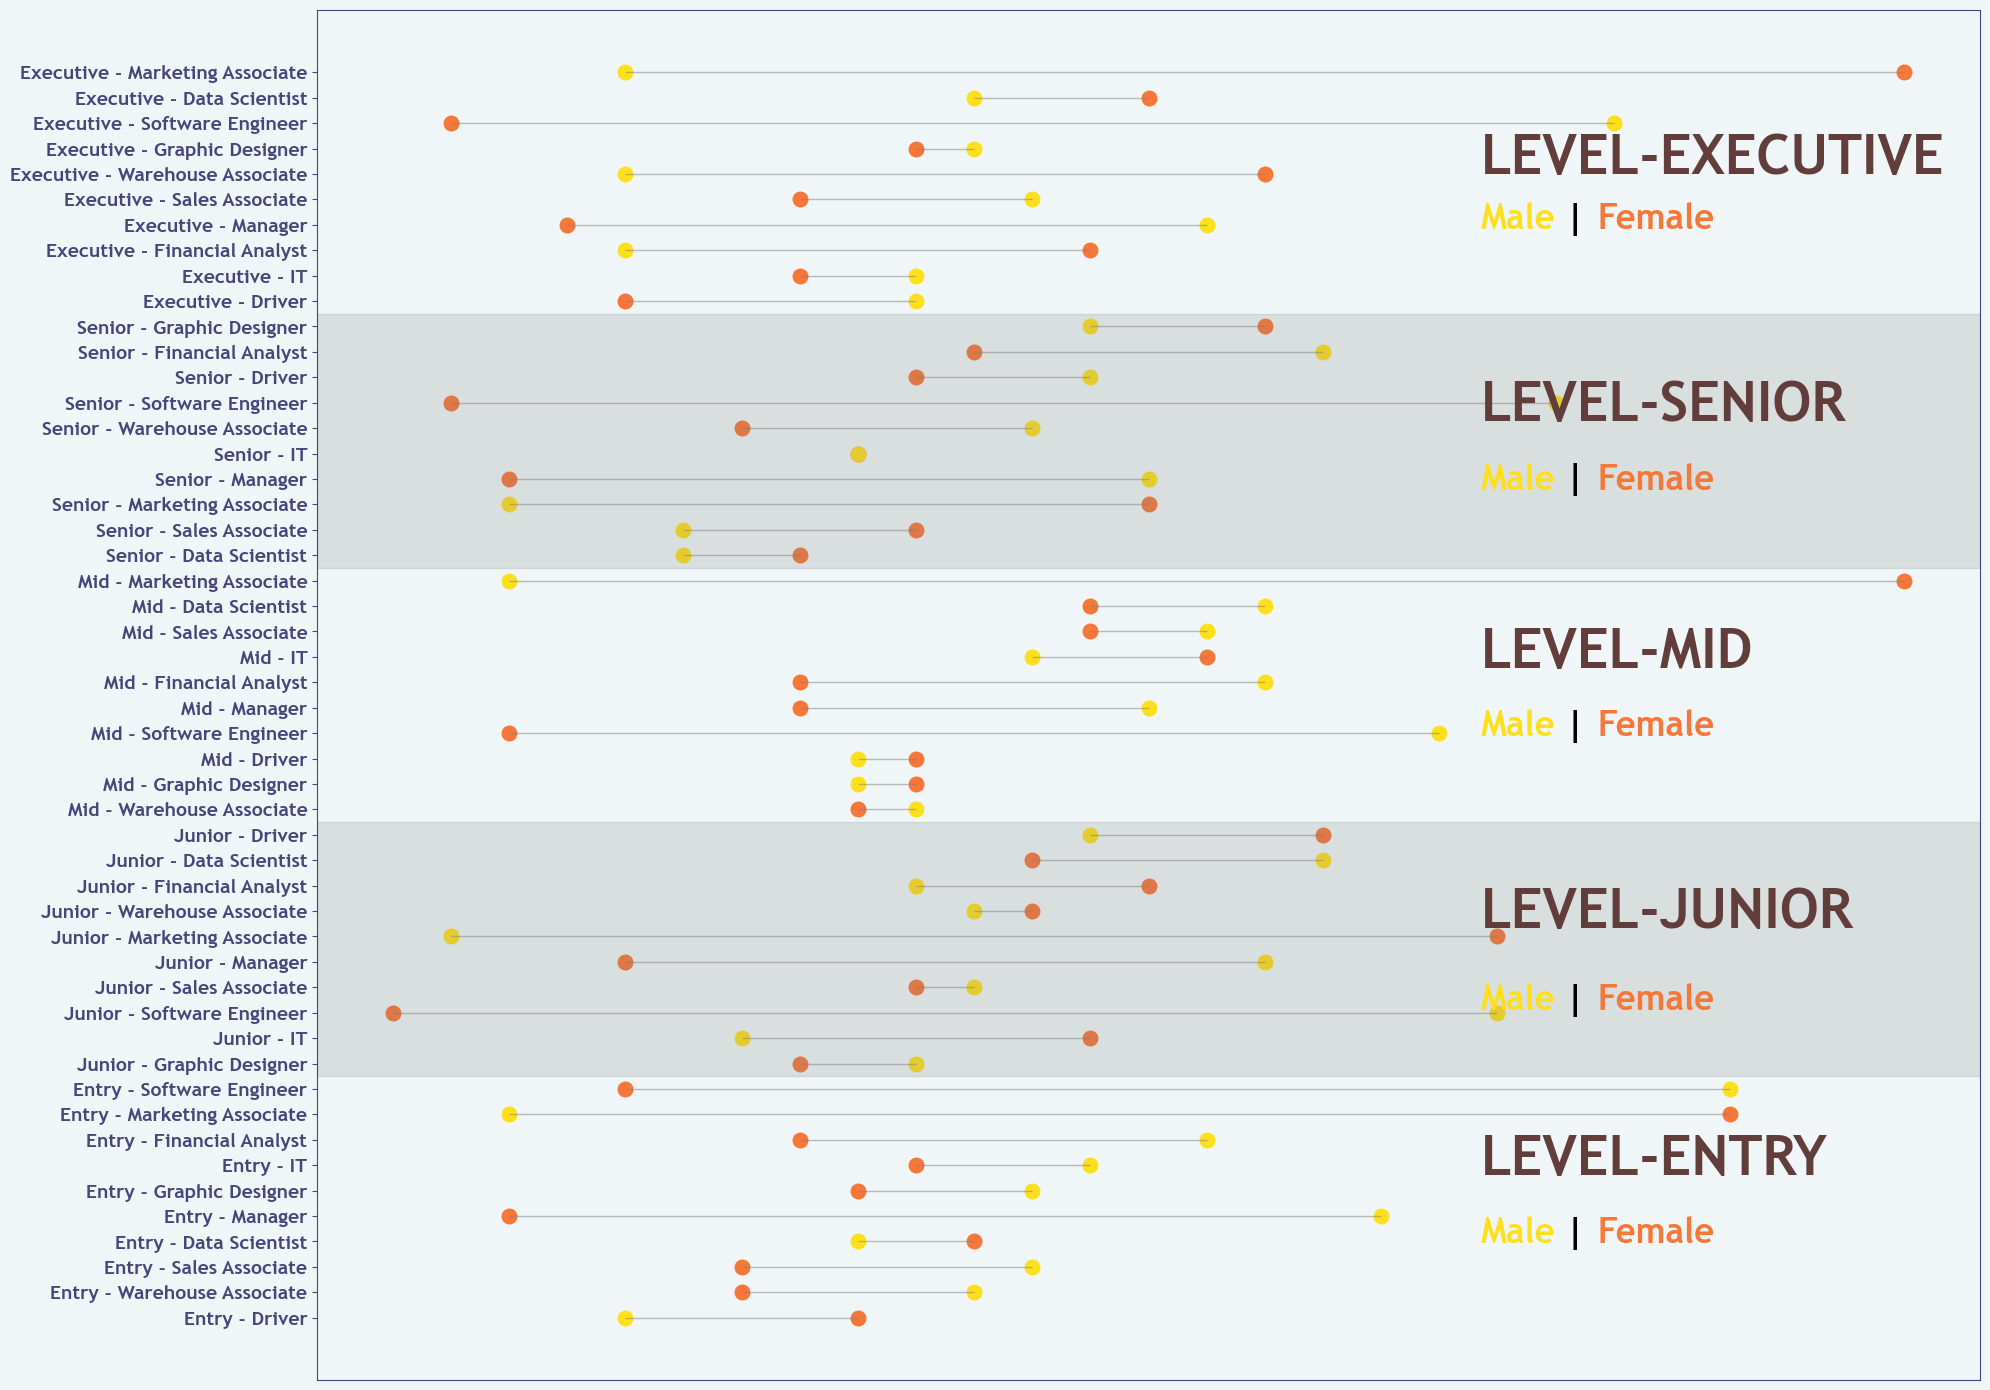

In [68]:
fig, ax = plt.subplots(figsize=(20, 14), facecolor=facecolor[0], dpi=100)
fig.patch.set_facecolor(facecolor[0])
ax.set_facecolor(facecolor[0])

# Lines connecting male and female counts
ax.hlines(y=gender_count['Role'],xmin=gender_count['GenderFemale'],xmax=gender_count['GenderMale'],color='grey', alpha=0.5, linewidth=1)

# Female dots
ax.scatter(gender_count['GenderFemale'],gender_count['Role'],color=colors2[0], s=110)

# Male dots
ax.scatter(gender_count['GenderMale'],gender_count['Role'],color=colors1[0], s=110)

# Formatting axes
ax.set_xlabel("")
ax.set_xticks([])
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=10, colors=accent[1])
ax.set_yticklabels(gender_count['Role'],
                   fontdict={'fontsize': 14, 'color': accent[1], 'fontname': fonts[0], 'weight': 'semibold'})
ax.invert_yaxis()

# Add custom level labels (you can adjust y_vals to match actual row positions)
add_title2(ax=ax, fontsize=40,x_vals=[0.7, 0.7, 0.7, 0.7, 0.7],y_vals=[0.88, 0.70, 0.52, 0.33, 0.15],
           labels=["LEVEL-EXECUTIVE", "LEVEL-SENIOR", "LEVEL-MID", "LEVEL-JUNIOR", "LEVEL-ENTRY"],colors=[accent[0]] * 5)
for level in ["Senior", "Junior"]:
    level_range = gender_count[gender_count["SeniorityLevel"] == level].index
    if not level_range.empty:
        ax.axhspan(level_range.min() - 0.5, level_range.max() + 0.5, color='grey', alpha=0.2)
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.84, 0.84, 0.84],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.65, 0.65, 0.65],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.47, 0.47, 0.47],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.27, 0.27, 0.27],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
add_title2(ax=ax, fontsize=25, x_vals=[0.7, 0.75, 0.77], y_vals=[0.1, 0.1, 0.1],labels=["Male", "|", "Female"], colors=[colors1[0], "black", colors2[0]])
# Title and spines
ax.set_title("", fontsize=14, color=accent[0], pad=20)
set_spines_color1(ax, accent[1])

plt.tight_layout()
plt.show()


In [69]:
def get_gender_distribution_df(df, dept_col='Department', gender_col='Gender'):
    ct = pd.crosstab(df[dept_col], df[gender_col])
    ct = ct.reindex(columns=['Male', 'Female'], fill_value=0)
    ct['Total'] = ct.sum(axis=1)
    ct['Male %'] = (ct['Male'] / ct['Total'] * 100).round(1)
    ct['Female %'] = (ct['Female'] / ct['Total'] * 100).round(1)
    ct['Workforce %'] = (ct['Total'] / ct['Total'].sum() * 100).round(1)
    return ct[['Male %', 'Female %', 'Workforce %']]


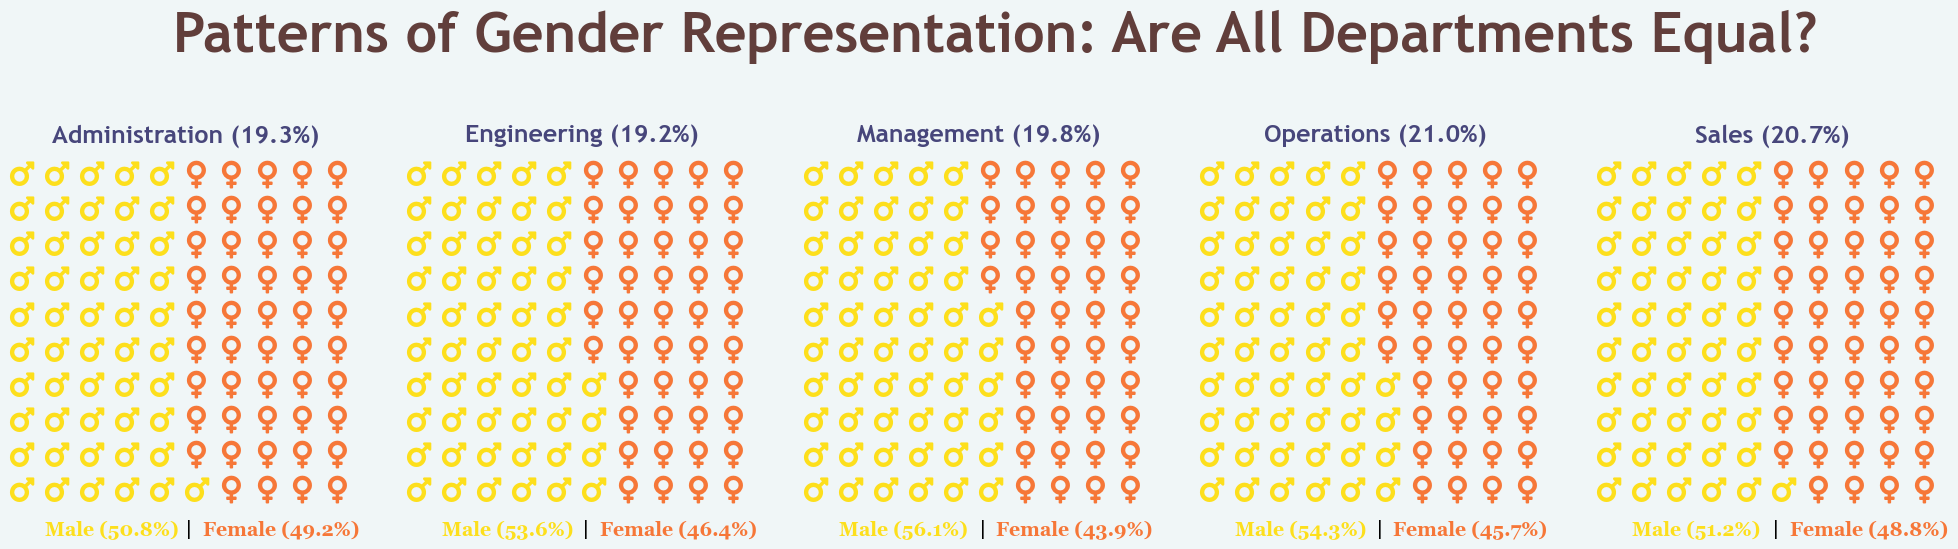

In [100]:
gender_df = get_gender_distribution_df(df, dept_col='Dept', gender_col='Gender')
plot1 = {
    'values': [gender_df.iloc[0]['Male %'], gender_df.iloc[0]['Female %']],'labels': ['Male', 'Female'],'icons':['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_style': ['solid', 'solid'],'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot2 = {'values': [gender_df.iloc[1]['Male %'], gender_df.iloc[1]['Female %']],'labels': ['Male', 'Female'],'icons': ['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_style': ['solid', 'solid'],'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot3 = {'values': [gender_df.iloc[2]['Male %'], gender_df.iloc[2]['Female %']],'labels': ['Male', 'Female'],'icons': ['mars', 'venus'],'colors': [colors1[0], colors2[0]],'icon_size': 20,
    'icon_style': ['solid', 'solid'],'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot4 = {'values': [gender_df.iloc[3]['Male %'], gender_df.iloc[3]['Female %']],'labels': ['Male', 'Female'],'icons': ['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_style': ['solid', 'solid'],'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot5 = {'values': [gender_df.iloc[4]['Male %'], gender_df.iloc[4]['Female %']],'labels': ['Male', 'Female'],'icons':['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_style': ['solid', 'solid'],'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

fig = plt.figure(FigureClass=Waffle,plots={151: plot1, 152: plot2, 153: plot3, 154: plot4, 155: plot5},rows=10,columns=10,figsize=(20, 7))
plt.subplots_adjust(wspace=0.8)
fig.set_facecolor(facecolor[0])
fig.suptitle("Patterns of Gender Representation: Are All Departments Equal?",fontsize=40,fontname=fonts[0],fontweight='bold',color=accent[0],y=0.9)

for i in range(5):
    fig.axes[i].text(0.5, 1.02,f"{gender_df.index[i]} ({gender_df.iloc[i]['Workforce %']}%)",ha='center',fontsize=18,
                     fontdict={'font': fonts[0],'weight': 'semibold','color': accent[1]})
    add_title1(ax=fig.axes[i],fontsize=14,x_vals=[0.1, 0.5, 0.55],y=-0.1,
               labels=[f"Male ({gender_df.iloc[i]['Male %']}%)","|",f"Female ({gender_df.iloc[i]['Female %']}%)"],colors=[colors1[0], "black", colors2[0]])
for ax in fig.axes:
    ax.legend().set_visible(False)
fig.show()


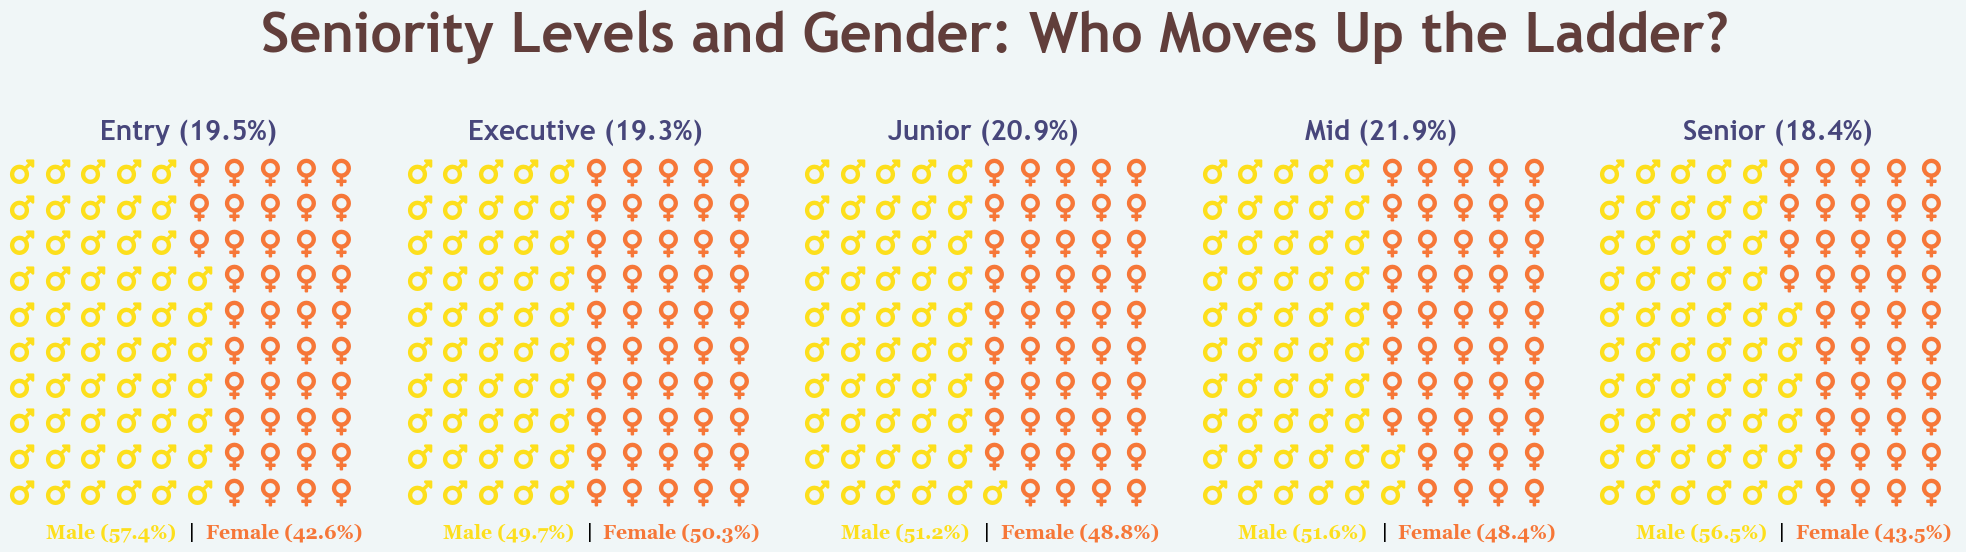

In [101]:
gender_df = get_gender_distribution_df(df, dept_col='SeniorityLevel', gender_col='Gender')
plot1 = {
    'values': [gender_df.iloc[0]['Male %'], gender_df.iloc[0]['Female %']],'labels': ['Male', 'Female'],'icons':['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot2 = {'values': [gender_df.iloc[1]['Male %'], gender_df.iloc[1]['Female %']],'labels': ['Male', 'Female'],'icons': ['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot3 = {'values': [gender_df.iloc[2]['Male %'], gender_df.iloc[2]['Female %']],'labels': ['Male', 'Female'],'icons': ['mars', 'venus'],'colors': [colors1[0], colors2[0]],'icon_size': 20,
    'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot4 = {'values': [gender_df.iloc[3]['Male %'], gender_df.iloc[3]['Female %']],'labels': ['Male', 'Female'],'icons': ['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

plot5 = {'values': [gender_df.iloc[4]['Male %'], gender_df.iloc[4]['Female %']],'labels': ['Male', 'Female'],'icons':['mars', 'venus'],'colors': [colors1[0], colors2[0]],
    'icon_size': 20,'icon_legend': False,'interval_ratio_x': 0.001,'interval_ratio_y': 0.001,'plot_anchor': 'C','alpha': 0.9}

fig = plt.figure(FigureClass=Waffle,plots={151: plot1, 152: plot2, 153: plot3, 154: plot4, 155: plot5},rows=10,columns=10,figsize=(20,7))
plt.subplots_adjust(wspace=0.8)
fig.set_facecolor(facecolor[0])
fig.suptitle("Seniority Levels and Gender: Who Moves Up the Ladder?",fontsize=40,fontname=fonts[0],fontweight='bold',color=accent[0],y=0.9)
# Add department names below each subplot
for i in range(5):
    fig.axes[i].text(0.5, 1.02,f"{gender_df.index[i]} ({gender_df.iloc[i]['Workforce %']}%)",ha='center',fontsize=20,
                     fontdict={'font': fonts[0],'weight': 'semibold','color': accent[1]})
    # Bottom title: Male % | Female %
    add_title1(ax=fig.axes[i],fontsize=14,x_vals=[0.1, 0.5, 0.55],y=-0.1,
               labels=[f"Male ({gender_df.iloc[i]['Male %']}%)","|",f"Female ({gender_df.iloc[i]['Female %']}%)"],colors=[colors1[0], "black", colors2[0]])
for ax in fig.axes:
    ax.legend().set_visible(False)
fig.show()


In [72]:
gender_counts = df.groupby(['JobTitle', 'Gender']).size().unstack(fill_value=0)
gender_counts['Total'] = gender_counts.sum(axis=1)
gender_counts['Female%'] = ((gender_counts.get('Female', 0) / gender_counts['Total']) * 100).round(1)
gender_counts['Male%'] = ((gender_counts.get('Male', 0) / gender_counts['Total']) * 100).round(1)
df_gender = gender_counts[['Female%', 'Male%']].reset_index()

In [118]:
def draw_gender_composition_bar(ax, job, gap_line):
    row = df_gender[df_gender['JobTitle'] == job].iloc[0]
    female_percent = row['Female%']
    male_percent = row['Male%']
    gap = round(abs(female_percent - male_percent), 2)
    ax.patch.set_facecolor(facecolor[0])
    x_female, x_male = 0.5,1.0
    # Female bar
    ax.bar(x_female, female_percent, width=0.3, color=colors2[0], label='Female')
    ax.text(x_female, female_percent + 2, f"{female_percent:.1f}%", ha='center', va='bottom',fontdict={'font': fonts[1], 'weight': 'bold', 'color': colors2[0], 'fontsize': 13})

    # Male bar
    ax.bar(x_male, male_percent, width=0.3, color=colors1[0], label='Male')
    ax.text(x_male, male_percent + 2, f"{male_percent:.1f}%", ha='center', va='bottom',fontdict={'font': fonts[1], 'weight': 'bold', 'color': colors1[0], 'fontsize': 13})
    # Title
    ax.text(0.75, 95, job.upper(), ha="center",fontdict={'font': fonts[0], 'size': 15, 'color': accent[0], 'weight': 'bold'})
    # Gap sentence
    ax.text(0.75, 80, f"{gap_line} ({gap}%)", ha="center", va="center",fontdict={'font': fonts[0], 'size': 14, 'color': accent[1], 'weight': 'bold'})
    # gender names 
    ax.text(1.2,30,"M \nA \nL \nE ", fontsize=14, fontname=fonts[1], fontweight='bold',color=colors1[0])
    ax.text(0.2,20,"F \nE \nM \nA \nL \nE ", fontsize=14, fontname=fonts[1], fontweight='bold',color=colors2[0])
    # Clean up
    ax.set_ylim(0, 110)
    ax.set_xlim(0.2, 1.3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

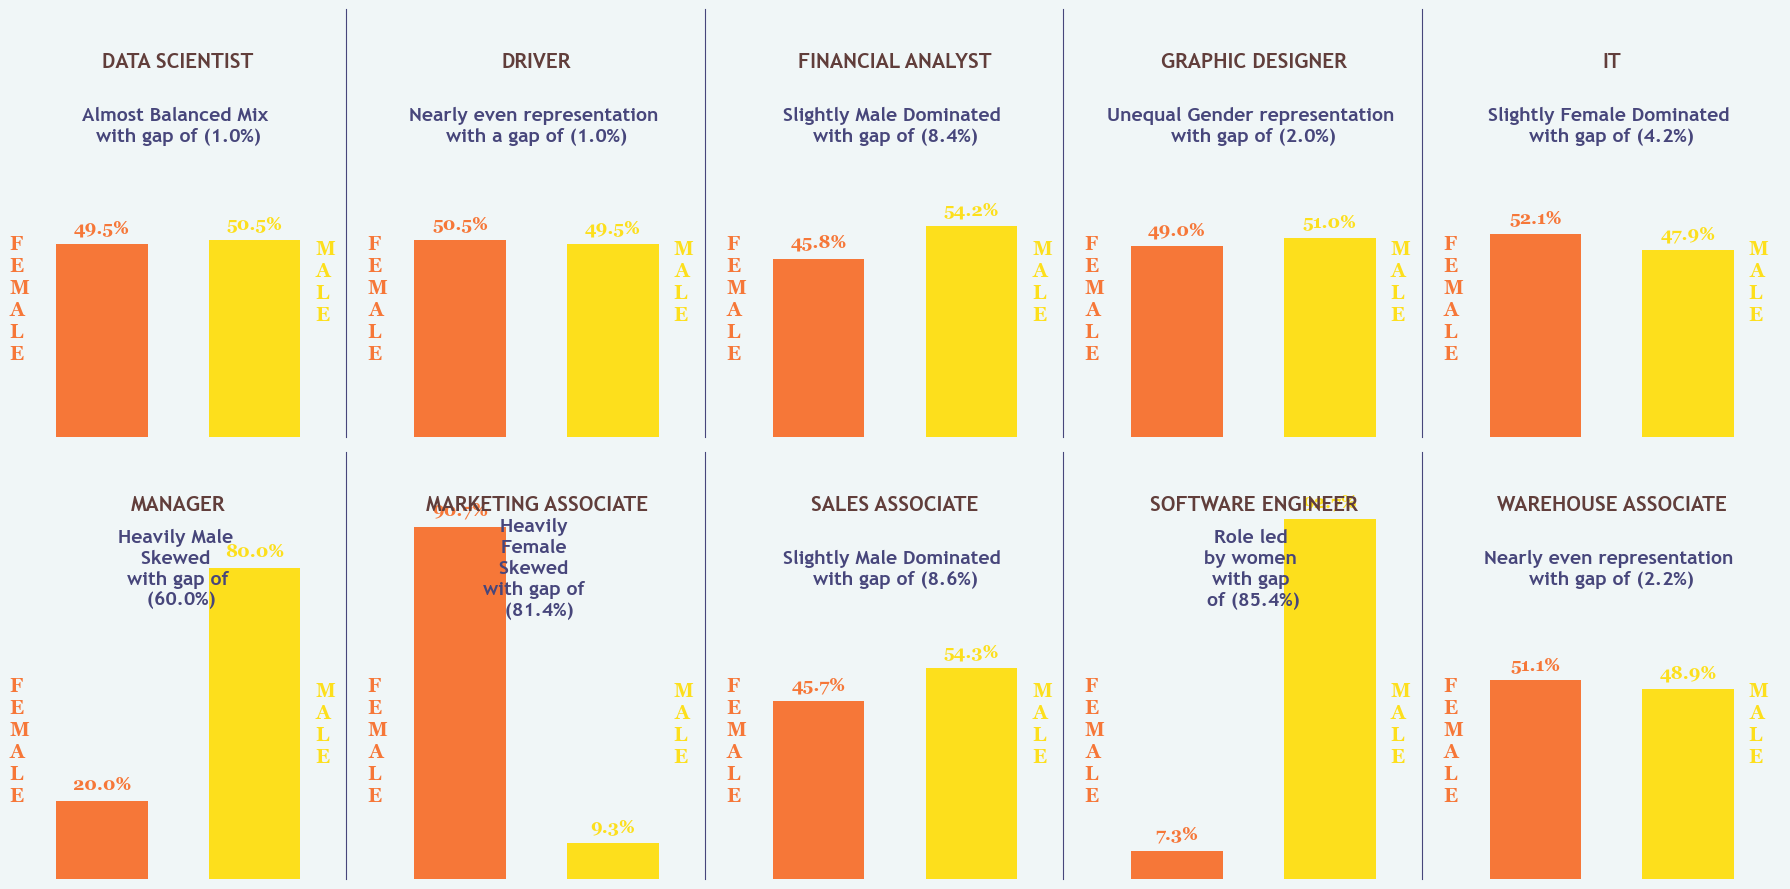

In [119]:
fig = plt.figure(figsize=(18, 9))
fig.patch.set_facecolor(facecolor[0])
ax1 = plt.subplot2grid((2, 5), (0, 0))
draw_gender_composition_bar(ax1, "Data Scientist", "Almost Balanced Mix \nwith gap of")

ax2 = plt.subplot2grid((2, 5), (0, 1))
draw_gender_composition_bar(ax2, "Driver", "Nearly even representation \nwith a gap of")

ax3 = plt.subplot2grid((2, 5), (0, 2))
draw_gender_composition_bar(ax3, "Financial Analyst", "Slightly Male Dominated \nwith gap of")

ax4 = plt.subplot2grid((2, 5), (0, 3))
draw_gender_composition_bar(ax4, "Graphic Designer", "Unequal Gender representation \nwith gap of")

ax5 = plt.subplot2grid((2, 5), (0, 4))
draw_gender_composition_bar(ax5, "IT", "Slightly Female Dominated \nwith gap of")

ax6 = plt.subplot2grid((2, 5), (1, 0))
draw_gender_composition_bar(ax6, "Manager", "Heavily Male \nSkewed \nwith gap of\n")

ax7 = plt.subplot2grid((2, 5), (1, 1))
draw_gender_composition_bar(ax7, "Marketing Associate", "Heavily \nFemale \nSkewed \nwith gap of \n")

ax8 = plt.subplot2grid((2, 5), (1, 2))
draw_gender_composition_bar(ax8, "Sales Associate", "Slightly Male Dominated \nwith gap of")

ax9 = plt.subplot2grid((2, 5), (1, 3))
draw_gender_composition_bar(ax9, "Software Engineer", "Role led \nby women \nwith gap \nof")

ax10 = plt.subplot2grid((2, 5), (1, 4))
draw_gender_composition_bar(ax10, "Warehouse Associate", "Nearly even representation \nwith gap of")
show_spine = [ax1, ax2, ax3, ax4, ax6, ax7, ax8, ax9]

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    if ax in show_spine:
        ax.spines['right'].set(color=accent[1], visible=True)
        [ax.spines[side].set_visible(False) for side in ['top', 'left', 'bottom']]
    else:
        [ax.spines[side].set_visible(False) for side in ['top', 'left', 'bottom', 'right']]

fig.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()


In [117]:
gender_counts = (df.groupby(["SeniorityLevel", "JobTitle", "Gender"]).size().unstack(fill_value=0))
gender_percent = (gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100).round(1)
gender_percent = gender_percent.rename(columns={"Female": "Female", "Male": "Male"}).reset_index()
level_gender= gender_percent.sort_values(by=["SeniorityLevel", "Female"], ascending=[True, False]).reset_index(drop=True)
level_gender.head()

Gender SeniorityLevel             JobTitle  Female  Male
0               Entry  Marketing Associate    92.0   8.0
1               Entry               Driver    66.7  33.3
2               Entry       Data Scientist    55.6  44.4
3               Entry                   IT    42.9  57.1
4               Entry     Graphic Designer    42.1  57.9

In [75]:
def plot_gender_by_level(data, level):
    gender_percent = data[data['SeniorityLevel'] == level]

    fig, ax = plt.subplots(figsize=(20, 6), facecolor=facecolor[0])
    ax.patch.set_facecolor(facecolor[0])
    ax.bar(gender_percent["JobTitle"],
           gender_percent["Female"],
           label="Female",
           width = 0.6,
           color=colors2[0])
    # Male bars (stacked on top of female)
    ax.bar(gender_percent["JobTitle"],
           gender_percent["Male"],
           bottom=gender_percent["Female"],
           width = 0.4,
           label="Male",
           color=colors1[0])

    ax.set_ylim(0, 100)
    ax.set_yticks([ 25, 50, 75, 100])
    ax.set_yticklabels([f"{x}%" for x in [25, 50, 75, 100]],fontdict={'font': fonts[1], 'color': accent[1], 'size': 15, 'weight': 'bold'})
    ax.set_ylabel("")

    # Dynamic Seniority Level label
    ax.text(0.5, 1.3, f"LEVEL: {level.upper()}", fontsize=30, fontweight="semibold",font=fonts[1],color=accent[0], ha="center", transform=ax.transAxes)

    # Style the x-axis tick labels
    job_titles_wrapped = [title.replace(" ", "\n") for title in gender_percent["JobTitle"]]
    ax.set_xticks(range(len(gender_percent["JobTitle"])))
    ax.set_xticklabels(job_titles_wrapped,
                       rotation=0,
                       ha="center",
                       fontdict={'font': fonts[0], 'color': accent[1], 'weight': 'bold', 'size': 16})
    add_title1(ax=ax,fontsize=25,x_vals=[0.44, 0.5, 0.52],y=1.1,
               labels=["Male","|","Female"],colors=[colors1[0], "black", colors2[0]])
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(accent[1])

    plt.tight_layout()
    plt.show()


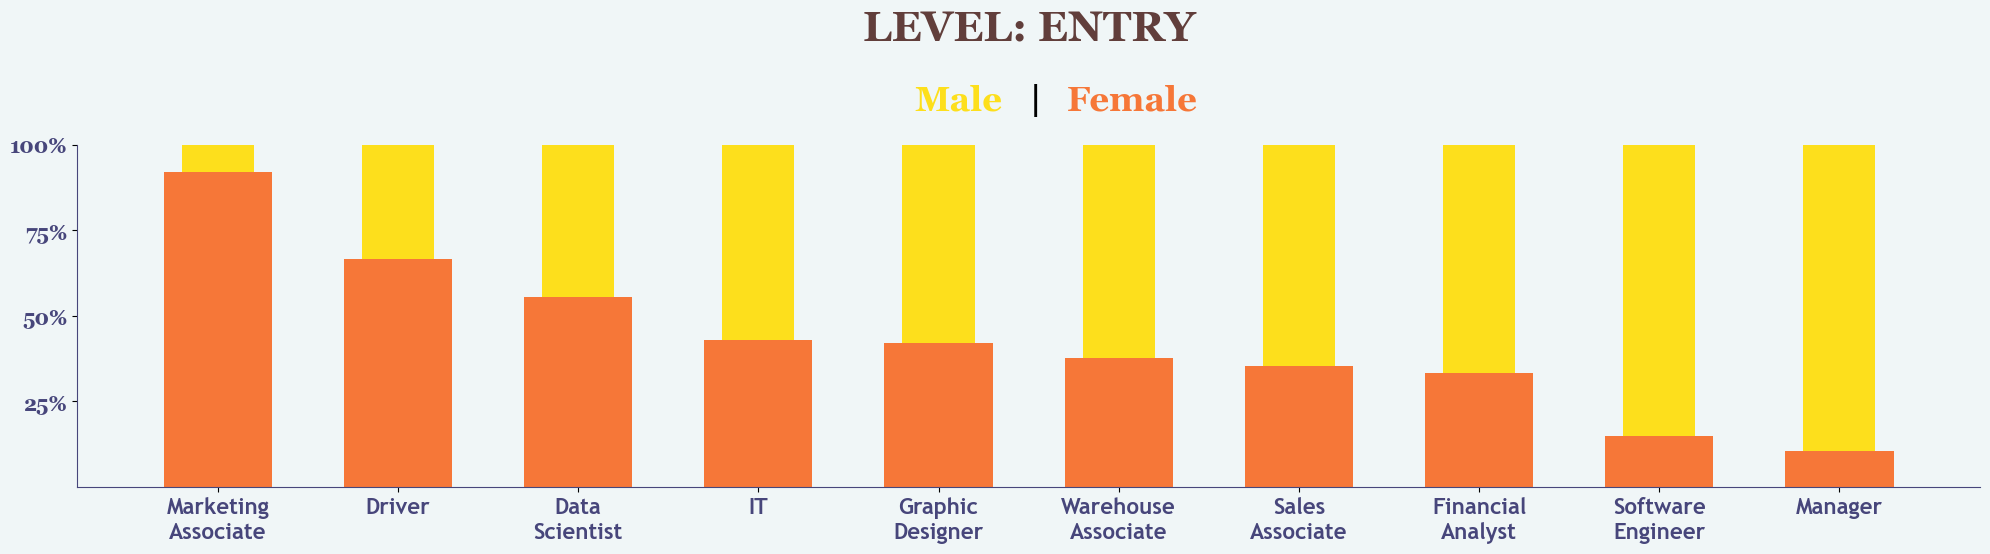

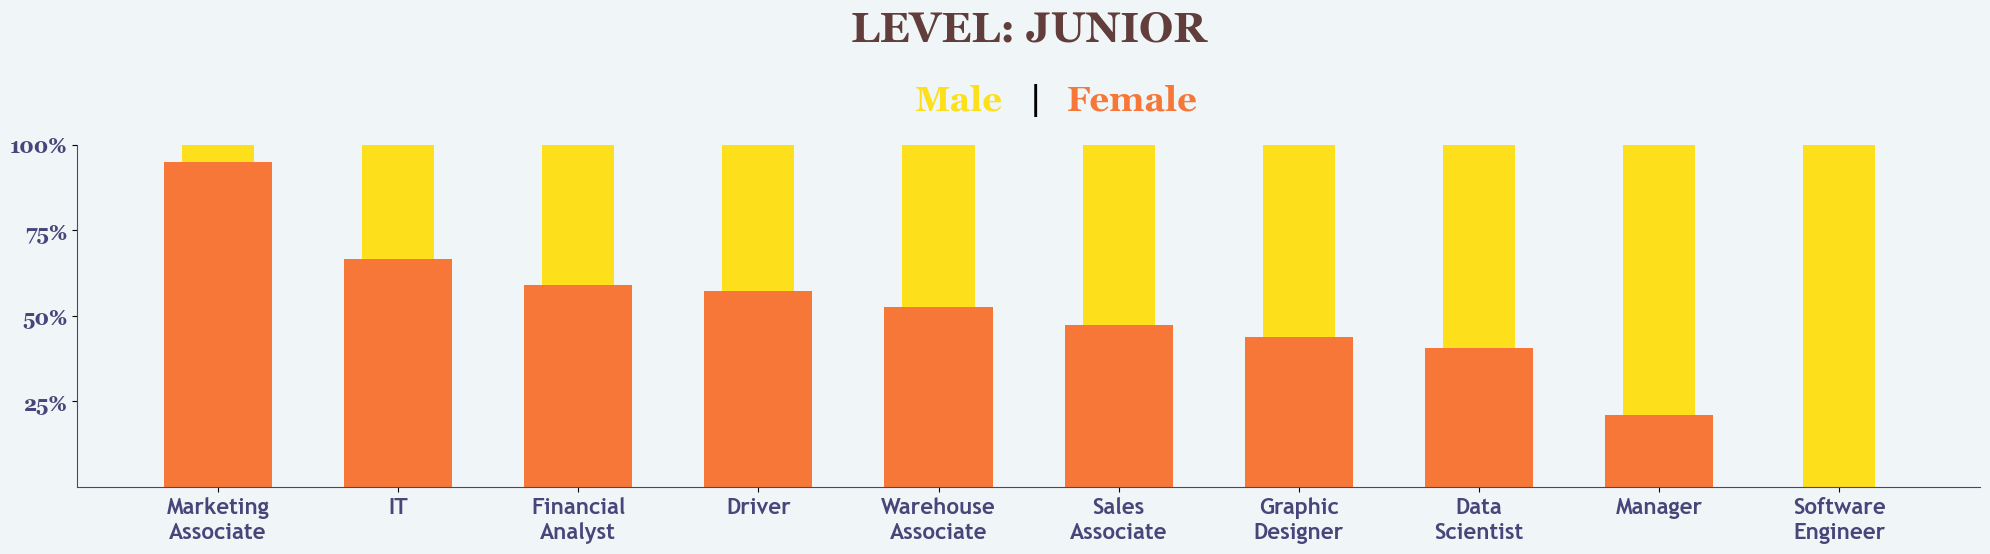

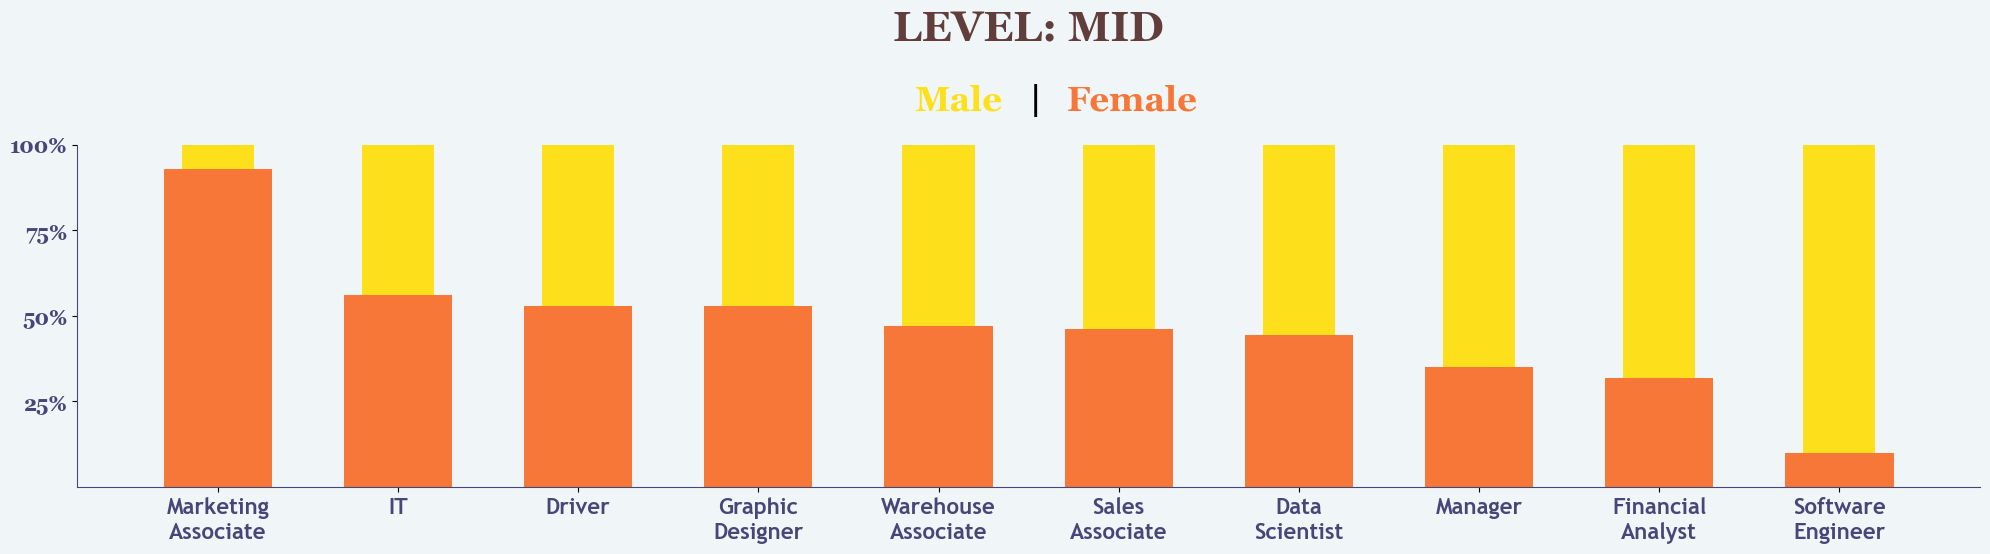

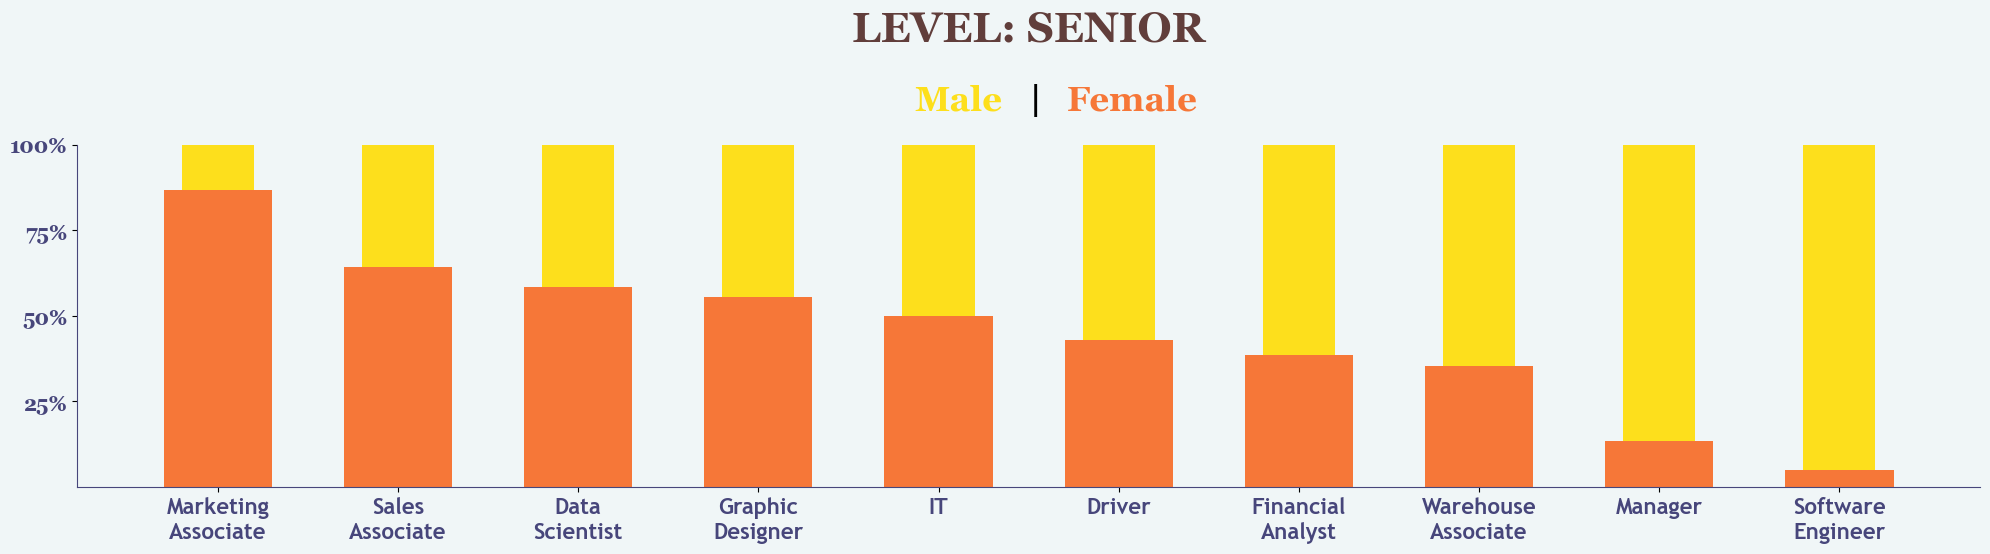

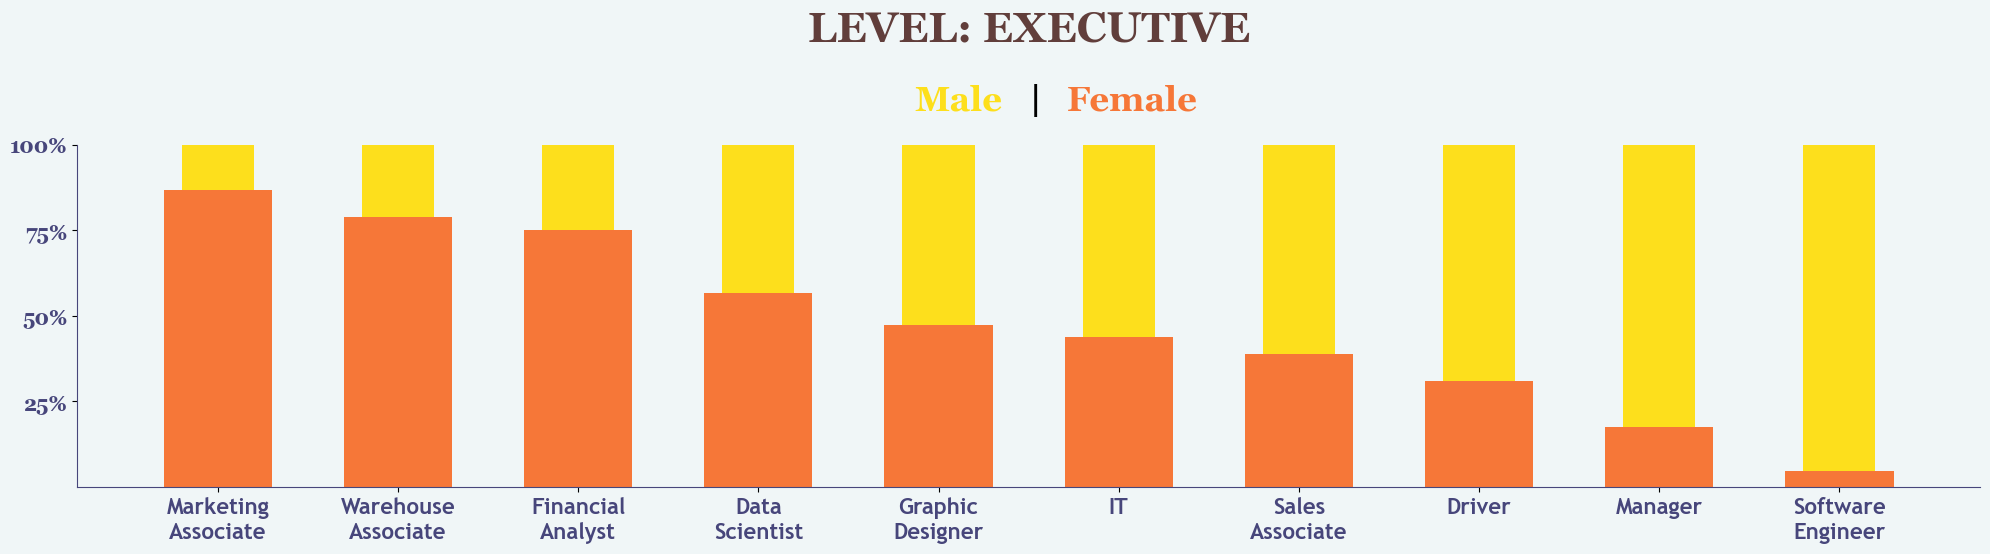

In [76]:
plot_gender_by_level(level_gender, "Entry")
plot_gender_by_level(level_gender, "Junior")
plot_gender_by_level(level_gender, "Mid")
plot_gender_by_level(level_gender, "Senior")
plot_gender_by_level(level_gender, "Executive")

There are several patterns as the level of seniority increases:

- In every role category, the proportion of male employees increases from entry to executive levels.

- Women are underrepresented in senior and executive levels across nearly all roles.

- Gender imbalance is most visible at executive and entry level while the gender gap is significantly wider in roles like Software Engineer, Manager, and Driver at executive level specifically..

Seniority Level based observations:

a) Entry Level: Gender parity observed in Marketing Associate, Graphic Designer and Data Scientist roles IT, Software Engineer, and Manager roles already show male dominance.

b) Junior Level: Female share declines sharply in technical and managerial roles like Software Engineer and Manager while Marketing Associate remains consistently gender-balanced at this early career stage.

c) Mid Level: Male dominance intensifies across all roles now and the largest gaps can be seen in Manager and Software Engineer roles also no roles exhibit a female-majority; gender disparity becomes structural.

d) Senior Level: Leadership roles such as Manager show drastically low female participation yet Marketing Associate retains some female representation.

e) Executive Level: Female presence nearly vanishes in top roles like Manager, IT, and Driver which indicates extreme gender gaps but which has been evident throughout.

Job Titles based observations:

Software Engineer & Manager: Show the steepest decline in female representation as seniority increases which means females are preffered less.

Marketing Associate: The one role which consistently has the most balanced gender ratio across all levels.

Driver & IT: Male-dominant Job Title, evidently.

Graphic Designer: Starts near balance but becomes male-leaning at higher levels.

In short , as whole, there is an upward trend in gender imbalance — roles start somewhat balanced at entry but transition into male-dominated  more and more into leadership structures, particularly in technical and managerial tracks. Female representation thins dramatically at senior and executive levels, suggesting may be promotion barriers but definitely GENDER ROLE PREFERENCES.

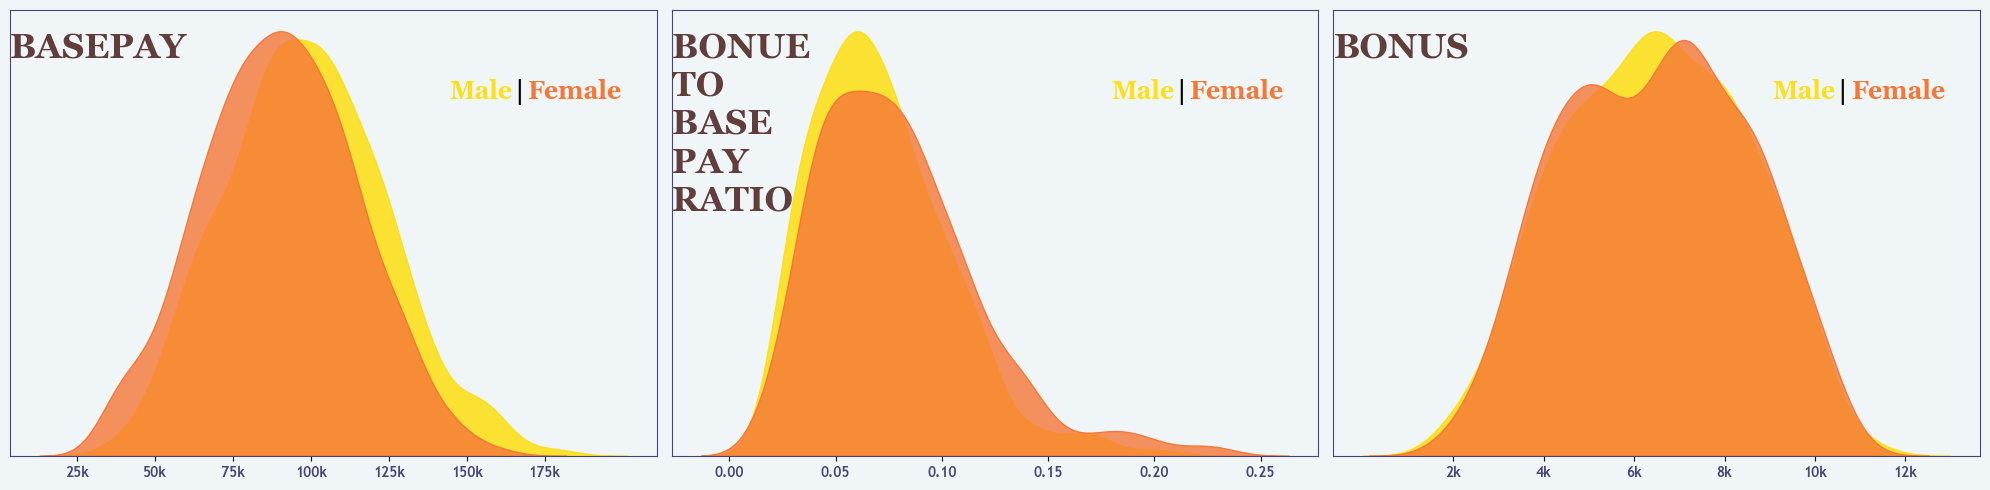

In [126]:
fig = plt.figure(figsize=(20, 5))
fig.patch.set_facecolor(facecolor[0]) 

ax = [None for _ in range(3)]
ax[0] = plt.subplot2grid((1, 3), (0, 0), colspan=1)  
ax[1] = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax[2] = plt.subplot2grid((1, 3), (0, 1), colspan=1)
# ax[2] = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax0= ax[0]
ax0.set_facecolor(facecolor[0])
sns.kdeplot(data=df1, x='BasePay', fill=True, alpha=0.9, color=colors1[0], ax=ax0)
sns.kdeplot(data=df2, x='BasePay', fill=True, alpha=0.8, color=colors2[0], ax=ax0)
ax0.set_xticks([25000, 50000, 75000, 100000, 125000, 150000, 175000])
ax0.set_xticklabels(["25k", "50k", "75k", "100k", "125k", "150k", "175k"],fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1]})
ax0.text(0.,0.95, "BASEPAY", fontsize=25, fontweight="semibold",font=fonts[1],color=accent[0],ha='left', va='top' ,transform=ax0.transAxes)

ax1= ax[1]
ax1.set_facecolor(facecolor[0])
sns.kdeplot(data=df1, x='Bonus', fill=True, alpha=0.9, color=colors1[0], ax=ax1)
sns.kdeplot(data=df2, x='Bonus', fill=True, alpha=0.8, color=colors2[0], ax=ax1)
ax1.set_xticks([2000, 4000, 6000, 8000, 10000, 12000])
ax1.set_xticklabels(["2k", "4k", "6k", "8k", "10k", "12k"],fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1]})
ax1.text(0.,0.95, "BONUS", fontsize=25, fontweight="semibold",font=fonts[1],color=accent[0],ha='left', va='top' ,transform=ax1.transAxes)

ax2= ax[2]
ax2.set_facecolor(facecolor[0])
sns.kdeplot(data=df1, x='BonusToBasePayRatio', fill=True, alpha=0.9, color=colors1[0], ax=ax2)
sns.kdeplot(data=df2, x='BonusToBasePayRatio', fill=True, alpha=0.8, color=colors2[0], ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), fontdict={'font': fonts[0], 'weight': 'bold', 'color': accent[1]})
ax2.text(0.,0.95, "BONUE \nTO \nBASE \nPAY \nRATIO", fontsize=25, fontweight="semibold",font=fonts[1],color=accent[0],ha='left', va='top' ,transform=ax2.transAxes)

for ax in [ax0, ax1, ax2]:
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.set_xlabel("")
    add_title1(ax=ax,fontsize=18,x_vals=[0.68, 0.78, 0.8],y=0.8,labels=["Male","|","Female"],colors=[colors1[0], "black", colors2[0]])
    for spine in ax.spines.values():
        spine.set_color(accent[1])
# for ax in [ax0, ax1, ax2]:

    
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.tight_layout()
plt.show()


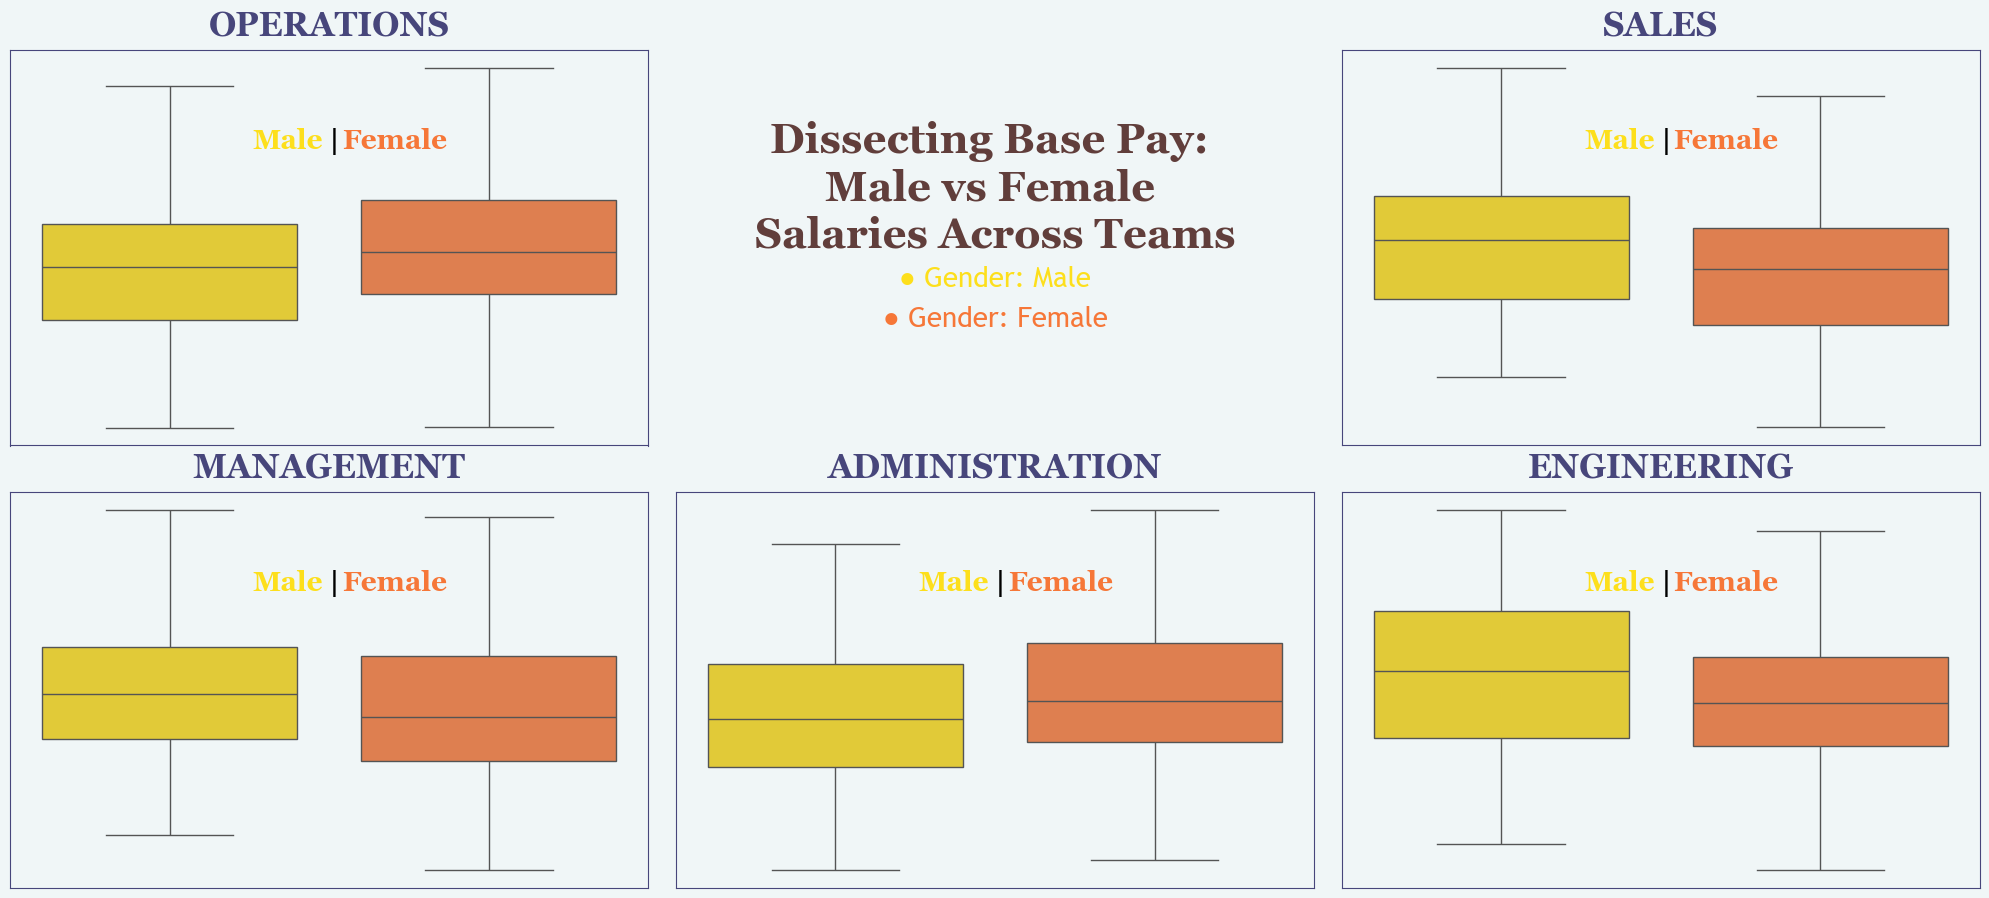

In [132]:
fig = plt.figure(figsize=(20, 9))
fig.patch.set_facecolor(facecolor[0])
departments = ['Operations', 'Sales', 'Management', 'Administration', 'Engineering']
positions = [(0, 0), (0, 2), (1, 0), (1, 1), (1, 2)]

for i, dept in enumerate(departments):
    ax = plt.subplot2grid((2, 3), positions[i])
    data = df[df["Dept"] == dept]
    ax.set_facecolor(facecolor[0])
    sns.boxplot(y=data["BasePay"],x=data["Gender"],palette=[colors1[0], colors2[0]],ax=ax,showfliers=False)
    ax.text(0.5, 1.1, dept.upper(), transform=ax.transAxes, ha="center", va="top",
            fontdict={'font': fonts[1], 'size': 24, 'color': accent[1], 'weight': 'bold'})
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_xticks([])
    add_title1(ax=ax, fontsize=20, x_vals=[0.38, 0.5, 0.52], y=0.75,labels=["Male", "|", "Female"],colors=[colors1[0], "black", colors2[0]])
    set_spines_color1(ax, accent[1])
ax_legend = plt.subplot2grid((2, 3), (0, 1))
ax_legend.set_facecolor(facecolor[0])
ax_legend.axis("off")
ax_legend.text(0.5, 0.5, "Dissecting Base Pay: \nMale vs Female \nSalaries Across Teams", fontsize=30, ha="center",
               color=accent[0], fontweight="bold", font=fonts[1])
ax_legend.text(0.5, 0.4, "● Gender: Male", fontsize=20, color=colors1[0],
               fontweight="normal", font=fonts[0], ha="center")
ax_legend.text(0.5, 0.3, "● Gender: Female", fontsize=20, color=colors2[0],
               fontweight="normal", font=fonts[0], ha="center")

plt.tight_layout()
plt.show()


In [134]:
data = df.groupby(["JobTitle", "Gender"]).agg(
    mean_basepay=("BasePay", "mean"),
    count=("BasePay", "count")
).round({'mean_basepay': 0}).reset_index()
data['mean_basepay'] = data['mean_basepay'].astype(int).apply(lambda x: f"{x // 1000}k")

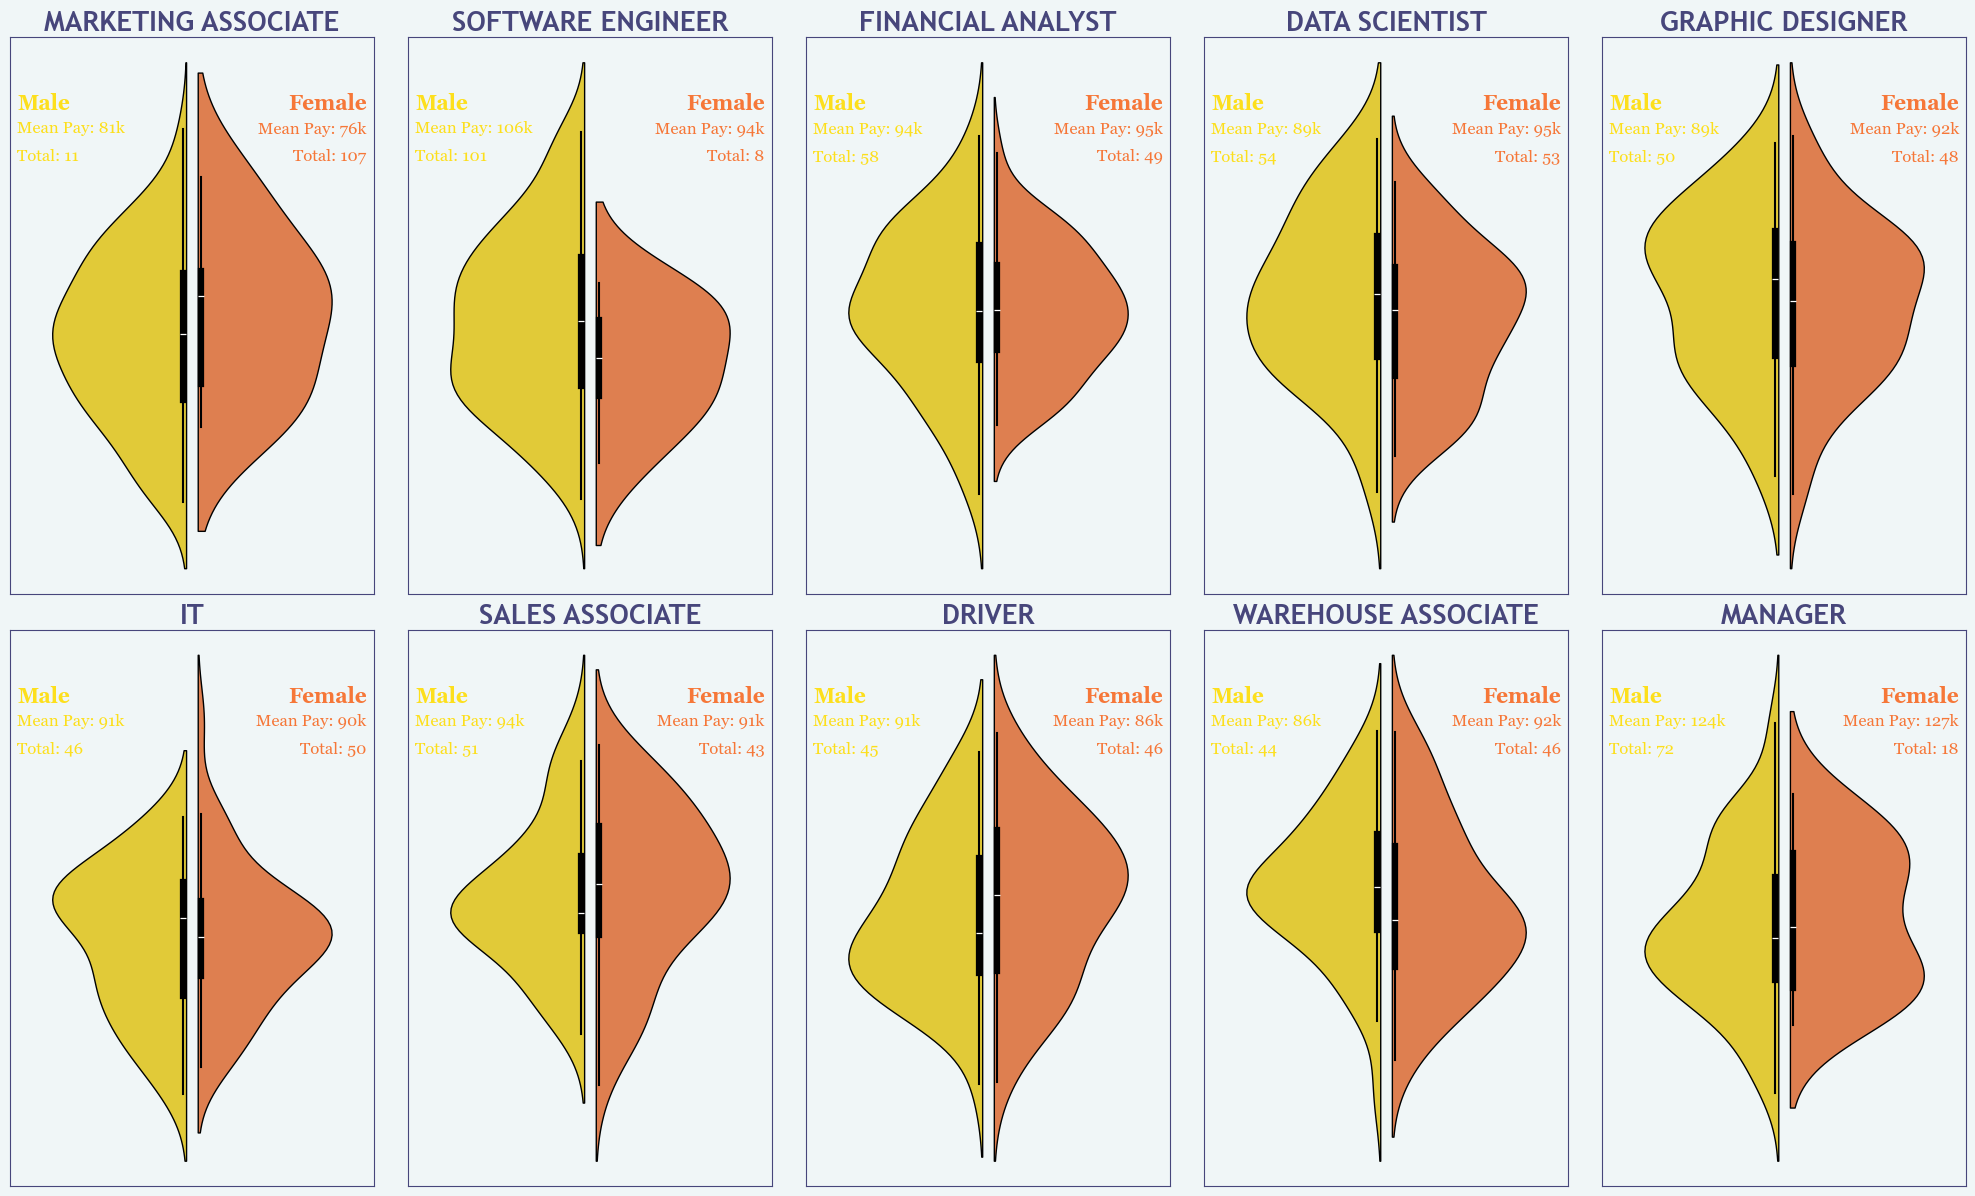

In [135]:
fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor(facecolor[0])

# 10 job titles for layout
titles = ['Marketing Associate', 'Software Engineer', 'Financial Analyst',
          'Data Scientist', 'Graphic Designer', 'IT', 'Sales Associate', 'Driver',
          'Warehouse Associate', 'Manager']

# Define 2x5 subplot grid positions
positions = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4),
             (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]

for i, title in enumerate(titles):
    ax = plt.subplot2grid((2, 5), positions[i])
    ax.set_facecolor(facecolor[0])

    subset = df[df["JobTitle"] == title]
    ax.axes.get_yaxis().set_visible(False)
    sns.violinplot(y=subset["BasePay"], hue=subset["Gender"], split=True,
                   palette=[colors1[0], colors2[0]], ax=ax, alpha=1,
                   linewidth=1, linecolor="k",gap=0.08)
    ax.text(0.5, 1.05, title.upper(), transform=ax.transAxes, ha="center", va="top",
        fontdict={'font': fonts[0], 'size': 20, 'color': accent[1], 'weight': 'bold'})
    ax.legend().set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    set_spines_color1(ax, accent[1])
    # Extract stats from your gender-summary dataframe
    male_stats = data[(data["JobTitle"] == title) & (data["Gender"] == "Male")]
    female_stats = data[(data["JobTitle"] == title) & (data["Gender"] == "Female")]
    
    # Left side (Male)
    ax.text(0.02, 0.90, "Male", transform=ax.transAxes, ha="left", va="top",
            fontdict={'font': fonts[1], 'size': 15, 'weight': 'bold', 'color': colors1[0]})
    ax.text(0.02, 0.85, f"Mean Pay: {male_stats['mean_basepay'].values[0]}", transform=ax.transAxes,
            ha="left", va="top", fontdict={'font': fonts[1], 'size': 12, 'color': colors1[0]})
    ax.text(0.02, 0.8, f"Total: {male_stats['count'].values[0]}", transform=ax.transAxes,
            ha="left", va="top", fontdict={'font': fonts[1], 'size': 12, 'color': colors1[0]})    
    # Right side (Female)
    ax.text(0.98, 0.90, "Female", transform=ax.transAxes, ha="right", va="top",
            fontdict={'font': fonts[1], 'size': 15, 'weight': 'bold', 'color': colors2[0]})
    ax.text(0.98, 0.85, f"Mean Pay: {female_stats['mean_basepay'].values[0]}", transform=ax.transAxes,
            ha="right", va="top", fontdict={'font': fonts[1], 'size': 12, 'color': colors2[0]})
    ax.text(0.98, 0.8, f"Total: {female_stats['count'].values[0]}", transform=ax.transAxes,
            ha="right", va="top", fontdict={'font': fonts[1], 'size': 12, 'color': colors2[0]})
plt.tight_layout()
plt.show()


In [81]:
def plot_kde_by_level(level):
    fig = plt.figure(figsize=(20, 10))
    fig.patch.set_facecolor(facecolor[0])
    fig.suptitle(f"Seniority Level: {level.title()}",fontsize=30,fontweight="semibold",font=fonts[1],color=accent[0],
                 y=1.02)
    
    titles = ['Marketing Associate', 'Software Engineer', 'Financial Analyst','Data Scientist', 'Graphic Designer', 'IT', 'Sales Associate', 'Driver',
              'Warehouse Associate', 'Manager']
    
    positions = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4),(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]
    
    xtick_vals = [50000, 75000, 100000, 125000, 150000, 175000]
    xtick_labels = [f"{int(x/1000)}K" for x in xtick_vals]
    
    for i, title in enumerate(titles):
        ax = plt.subplot2grid((2, 5), positions[i])
        ax.set_facecolor(facecolor[0])
        data = df[(df["JobTitle"] == title) & (df["SeniorityLevel"] == level)]
        sns.kdeplot(data=data[data["Gender"] == "Male"], x='BasePay',fill=True, alpha=0.9, color=colors1[0], ax=ax)
        sns.kdeplot(data=data[data["Gender"] == "Female"], x='BasePay',fill=True, alpha=0.8, color=colors2[0], ax=ax)
        ax.text(0.5, 1.09, title.upper(), transform=ax.transAxes, ha="center", va="top",fontdict={'font': fonts[0], 'size': 20, 'color': accent[1], 'weight': 'bold'})
        
        ax.set_xticks(xtick_vals)
        ax.set_xticklabels(xtick_labels,fontdict={'font': fonts[0], 'color': accent[1], 'size': 12, 'weight': 'semibold'})
        ax.text(0.02, 0.90, "Male", transform=ax.transAxes, ha="left", va="top",fontdict={'font': fonts[1], 'size': 15, 'weight': 'bold', 'color': colors1[0]})
        ax.text(0.98, 0.90, "Female", transform=ax.transAxes, ha="right", va="top",fontdict={'font': fonts[1], 'size': 15, 'weight': 'bold', 'color': colors2[0]})
        ax.set_yticks([])
        ax.set_xlabel("")
        ax.set_ylabel("")
        set_spines_color1(ax, accent[1])
    plt.tight_layout()
    plt.show()


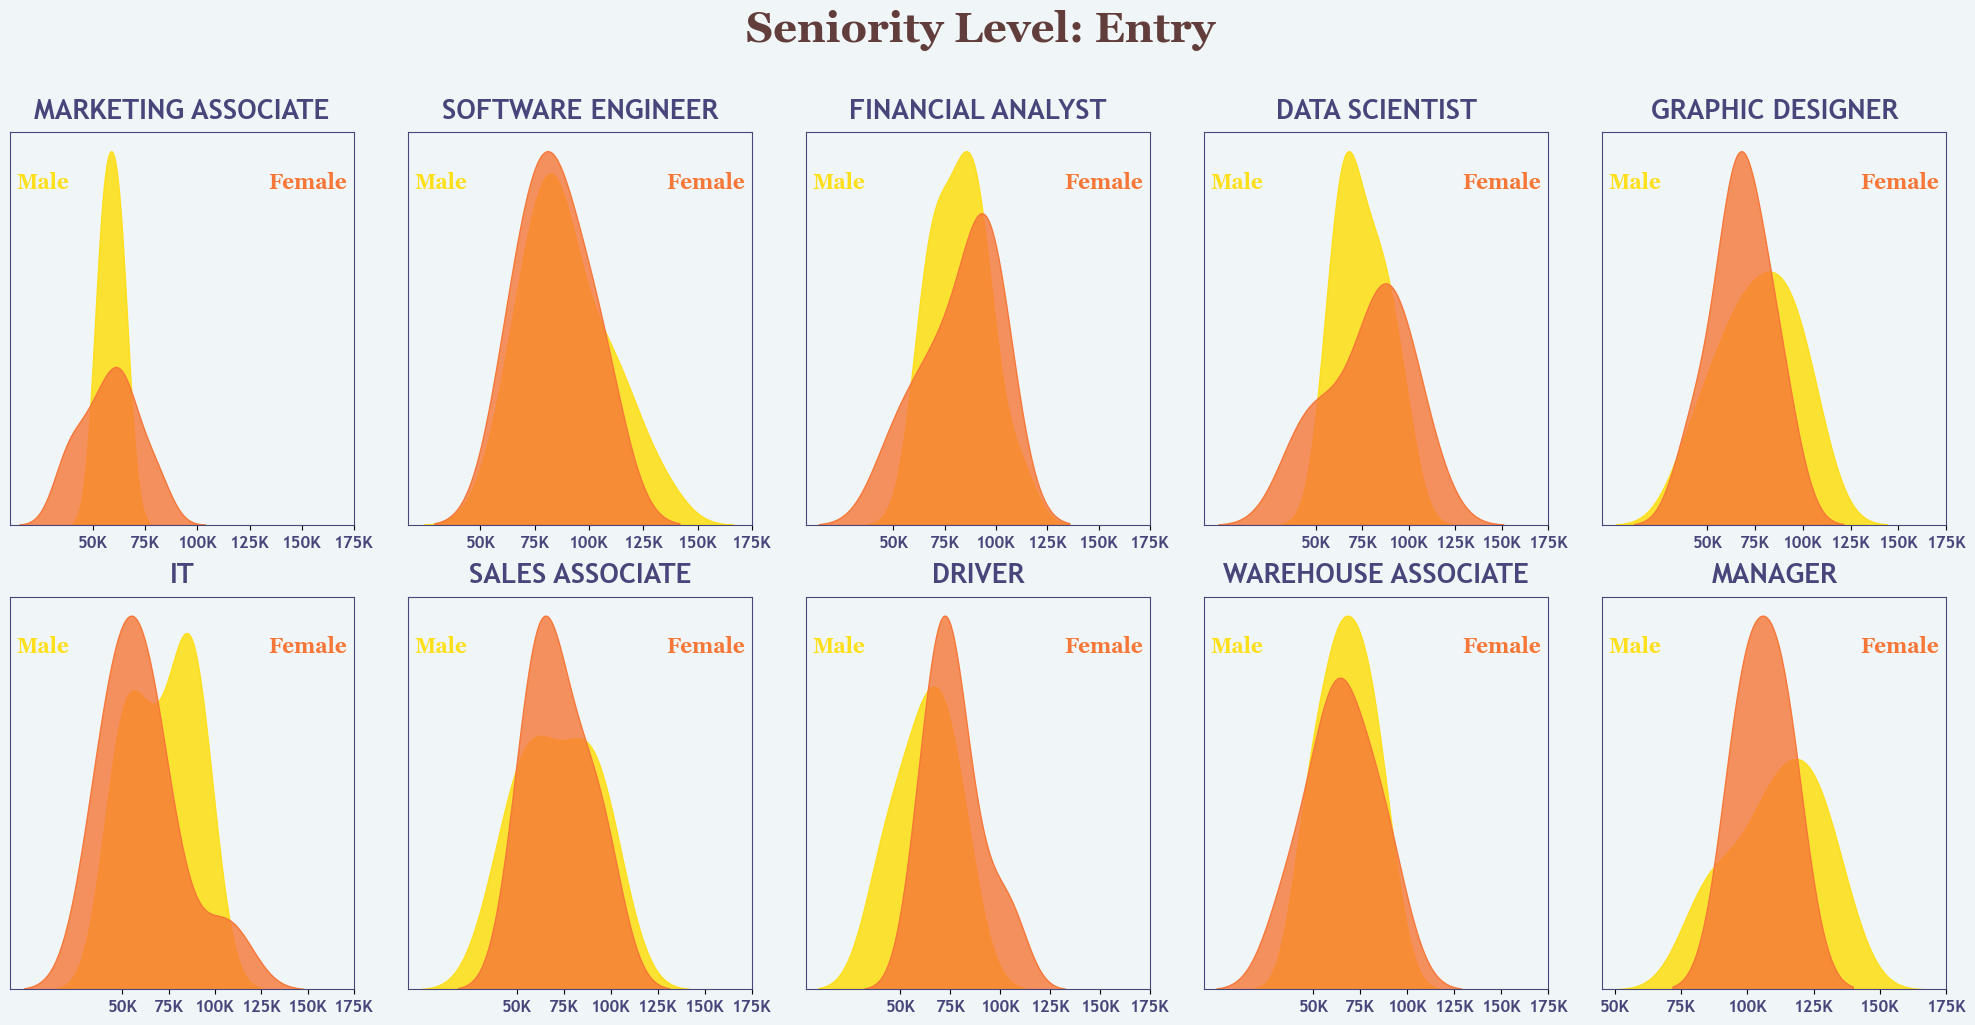

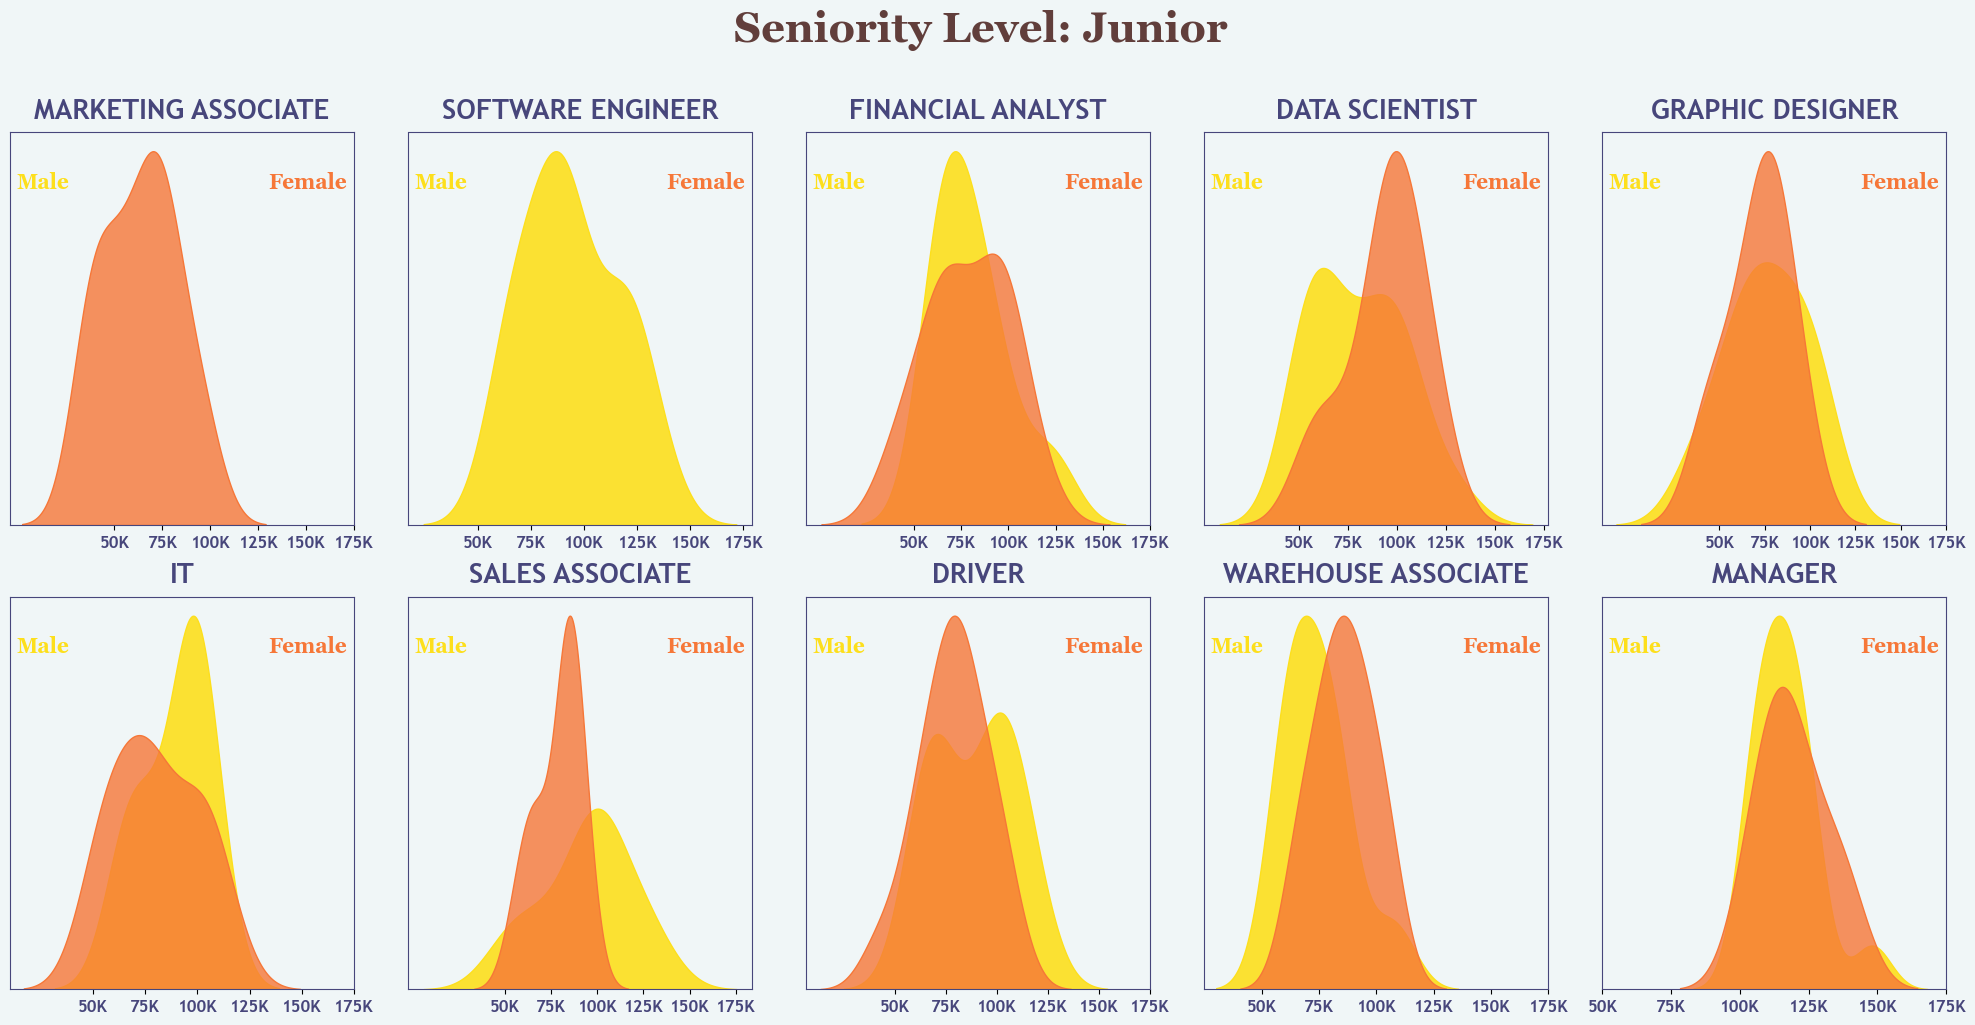

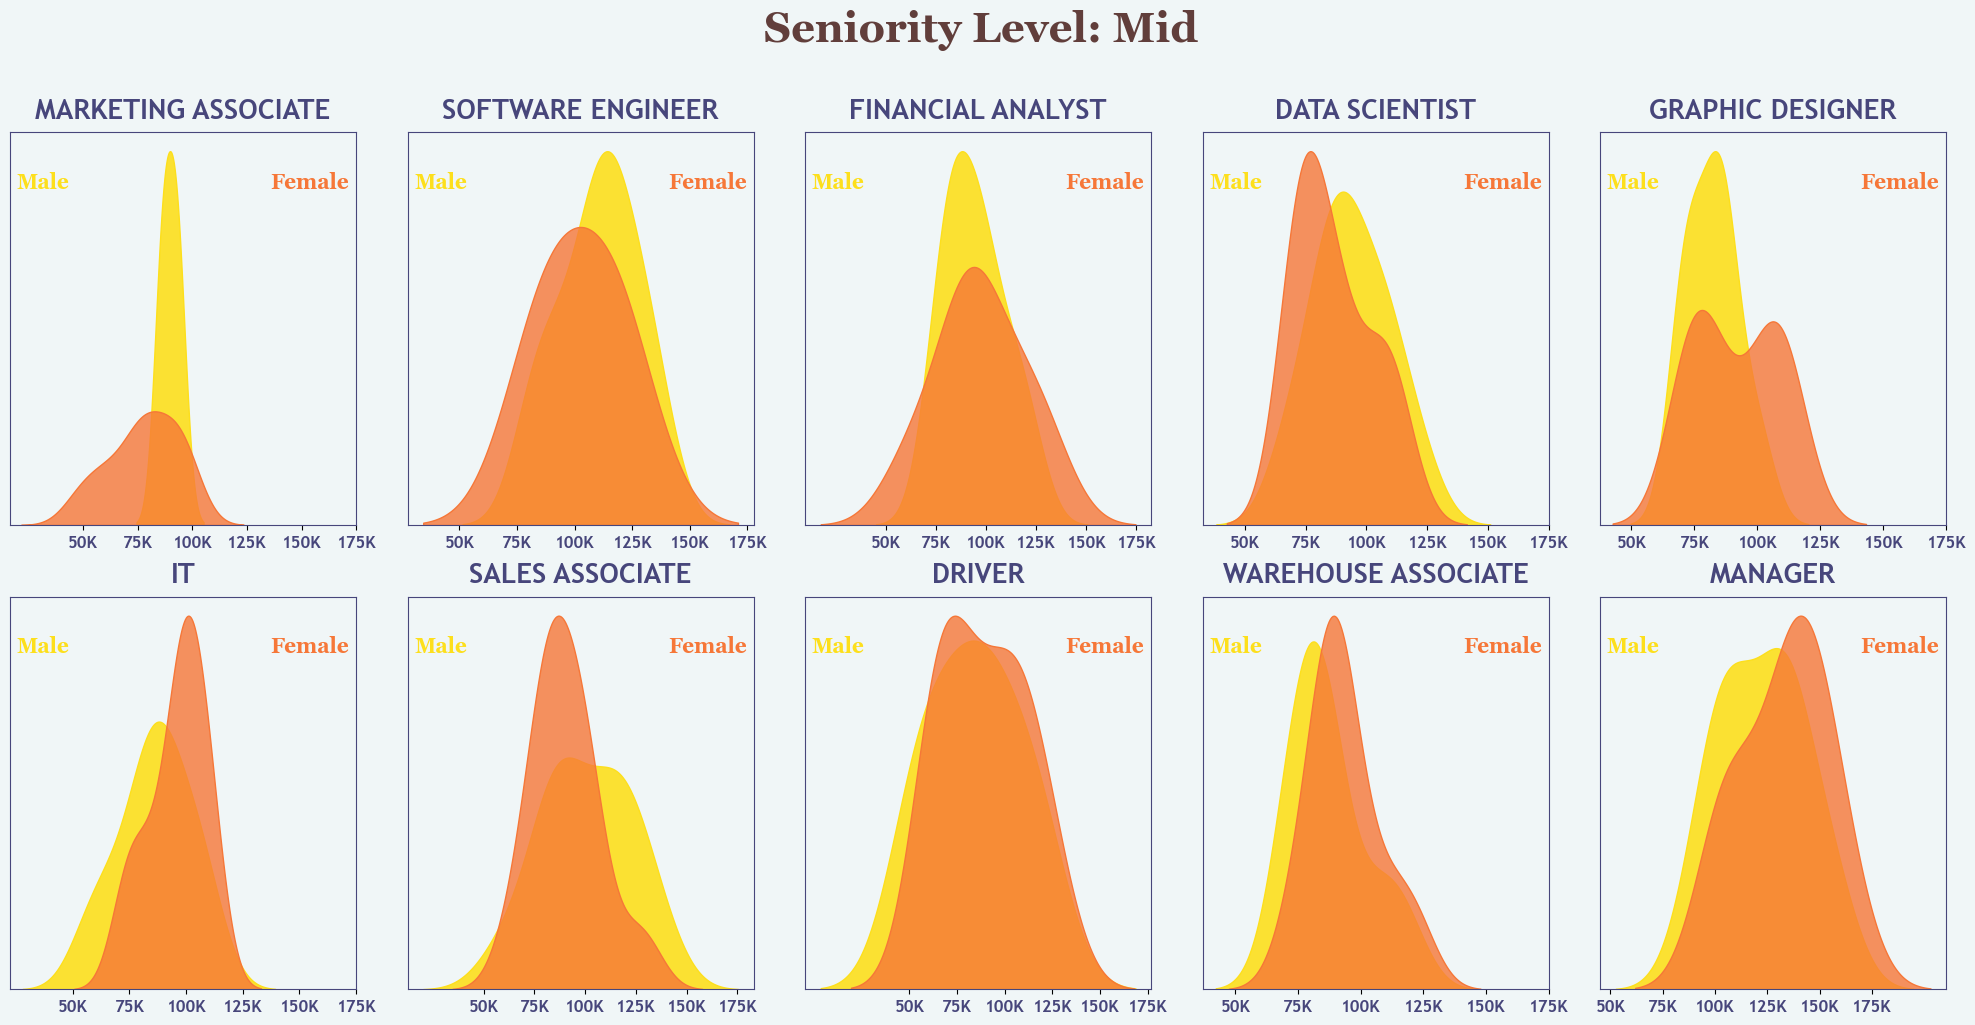

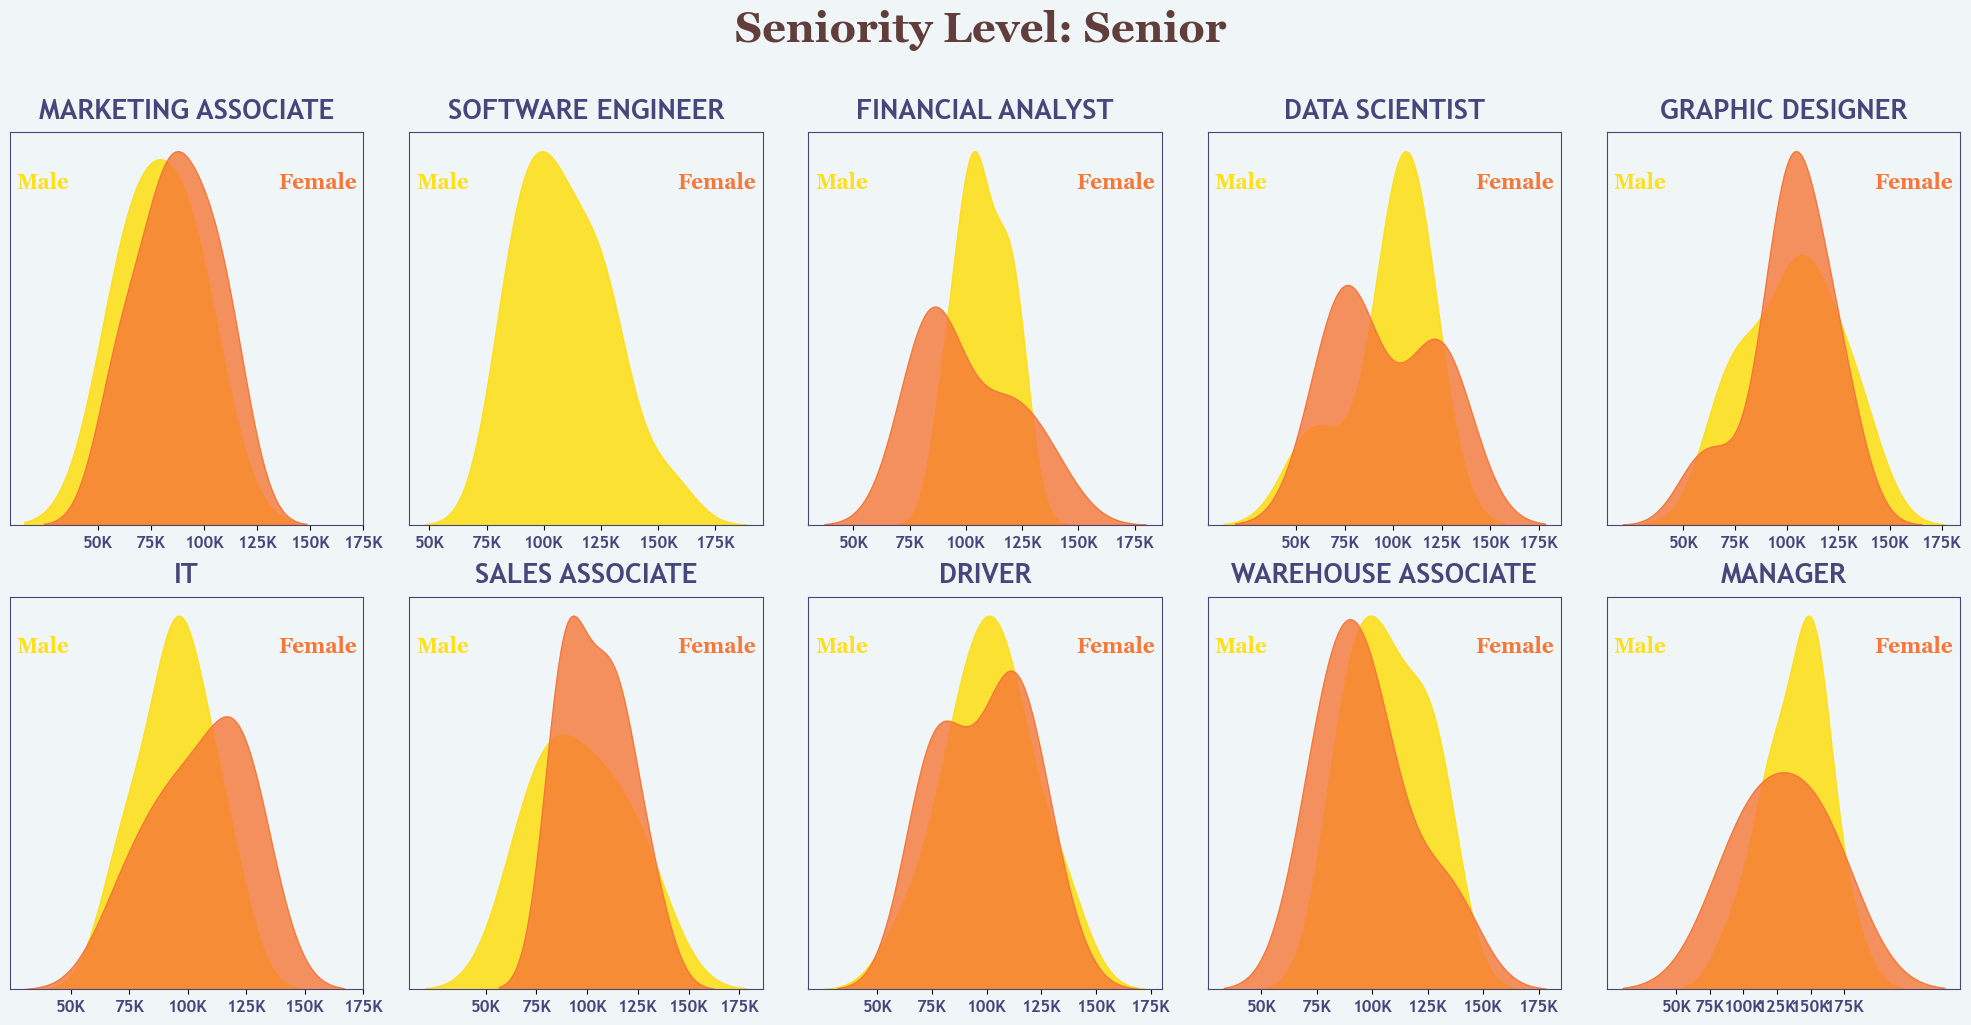

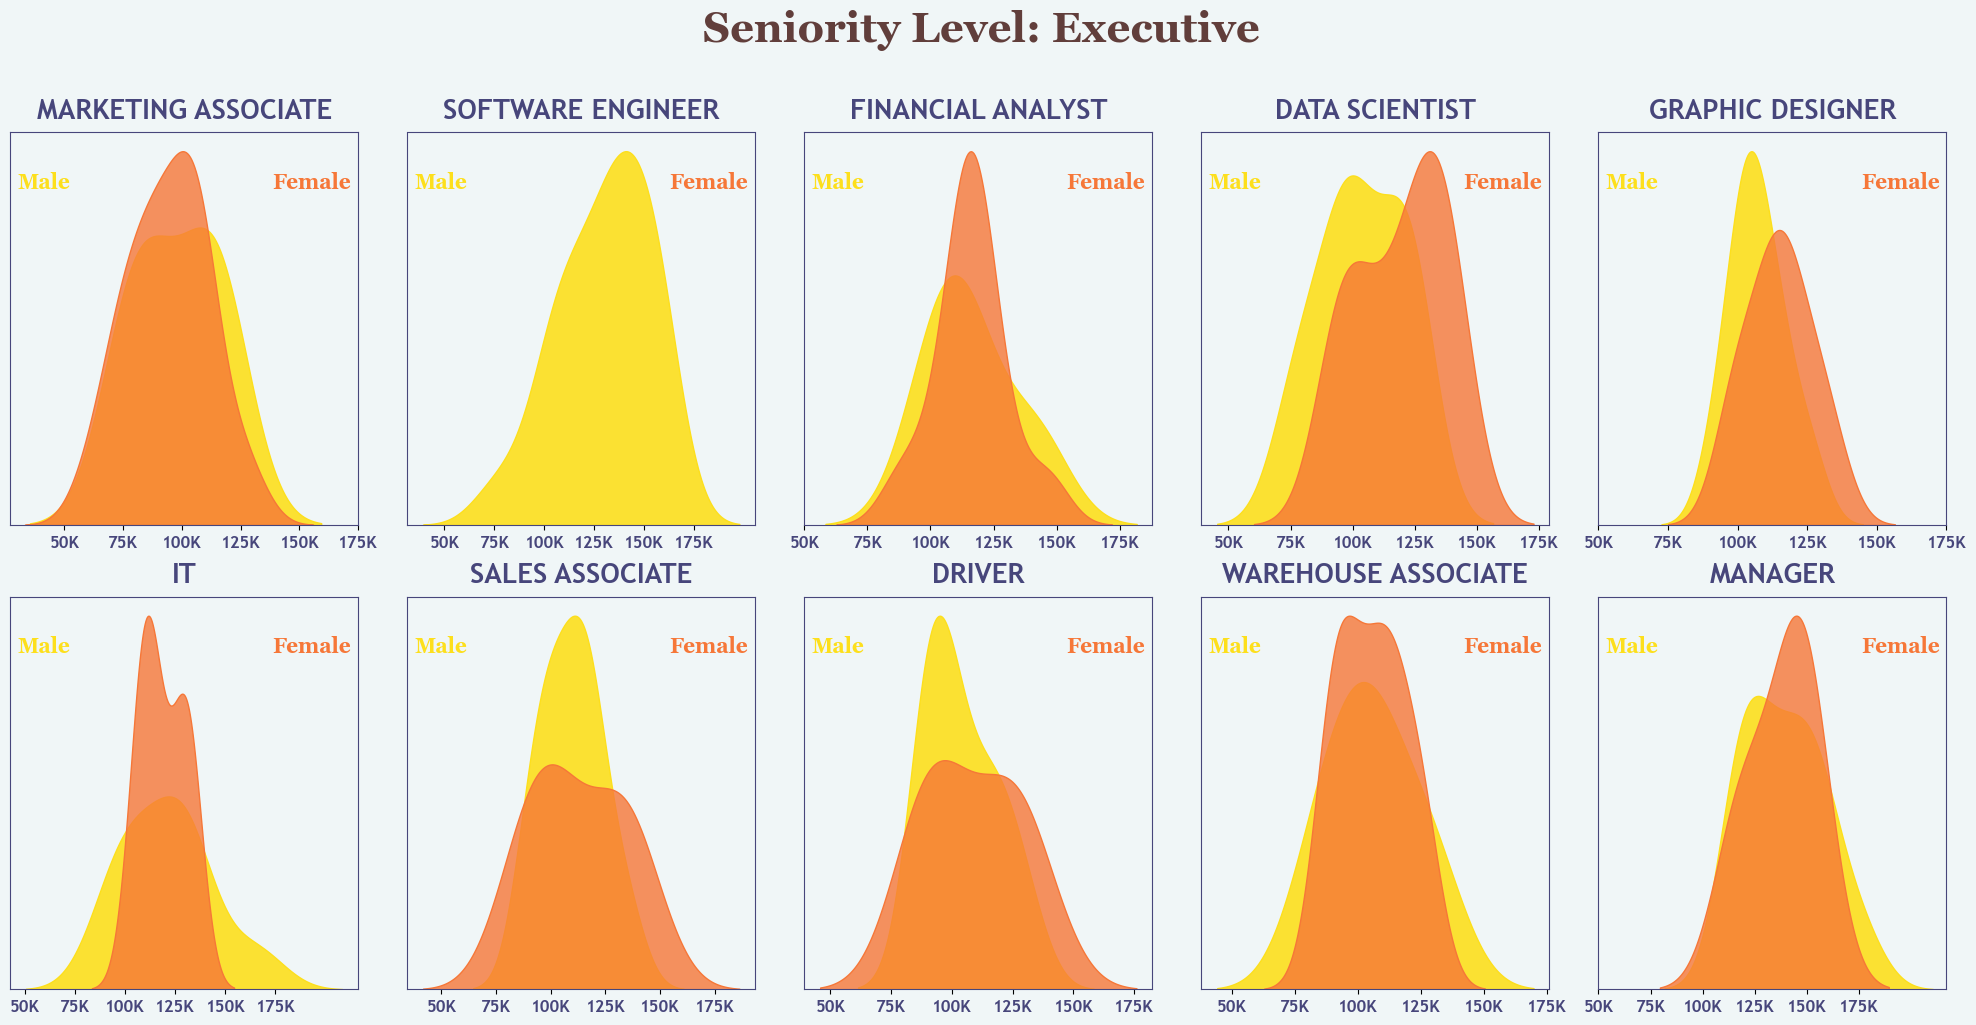

In [82]:
plot_kde_by_level(level= "Entry")
plot_kde_by_level(level= "Junior")
plot_kde_by_level(level= "Mid")
plot_kde_by_level(level= "Senior")
plot_kde_by_level(level= "Executive")

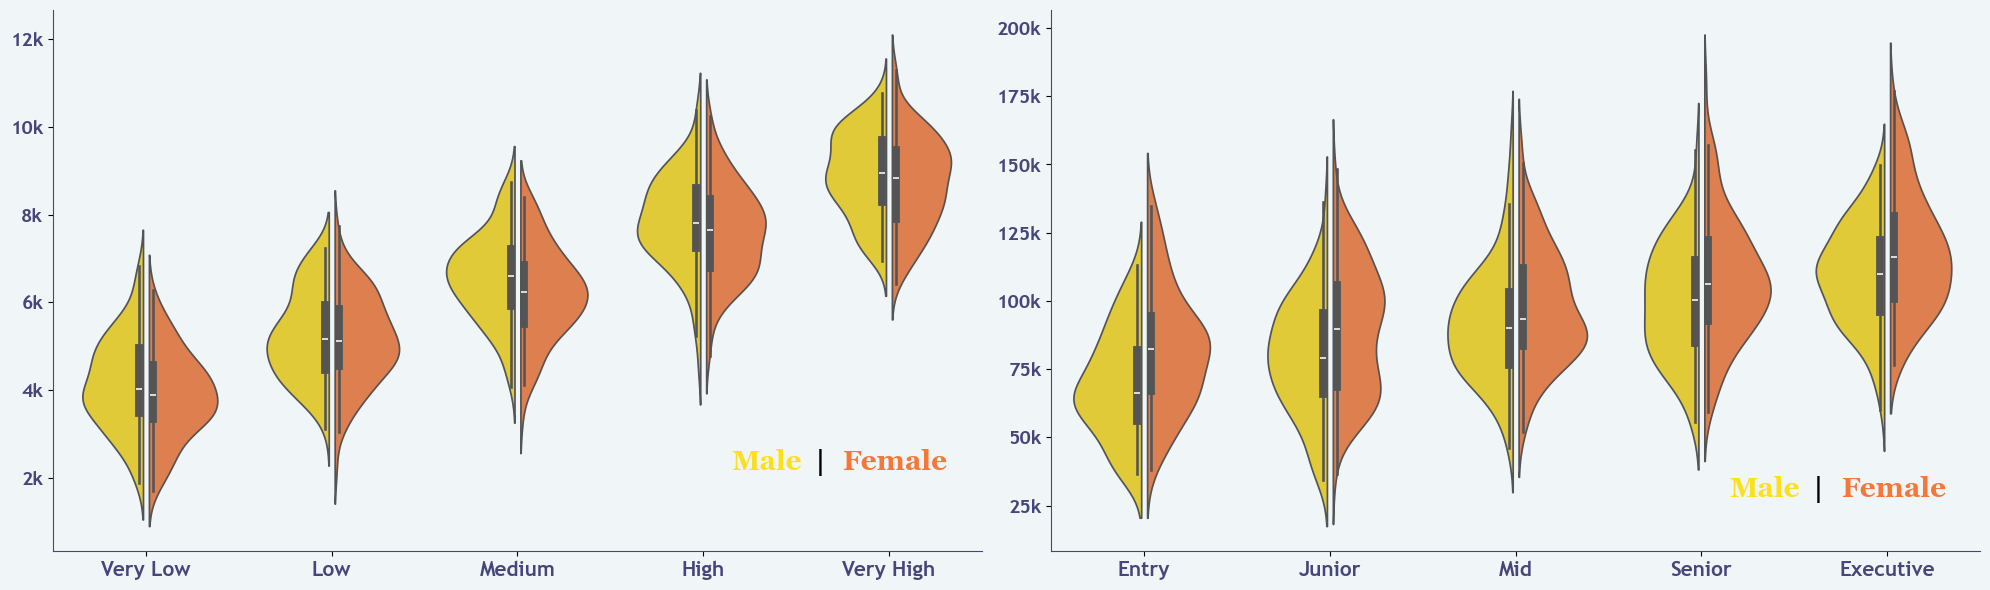

In [83]:
fig = plt.figure(figsize=(20, 6))
fig.patch.set_facecolor(facecolor[0])
palette= [colors1[0],colors2[0]]
# First subplot at position (0,0)
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.set_facecolor(facecolor[0])
sns.violinplot(x=df["PerfCategory"],y=df["Bonus"],hue=df["Gender"],split=True,gap=0.08,ax=ax1,palette=palette)
ax1.set_yticks([2000, 4000, 6000, 8000, 10000, 12000])
ax1.set_yticklabels(["2k", "4k", "6k", "8k", "10k", "12k"],fontdict={'fontfamily': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':14})
ax1.legend().remove()
ax1.set_xticklabels(ax1.get_xticklabels(),fontdict={'fontfamily': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':15})
ax1.set_xlabel("")
ax1.set_ylabel("")
add_title1(ax=ax1, fontsize=20, x_vals=[0.73,0.82, 0.85], y=0.15,labels=["Male", "|", "Female"],colors=[colors1[0], "black", colors2[0]])
set_spines_color1(ax1, accent[1])
ax1.spines[['top', 'right']].set_visible(False)


ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.set_facecolor(facecolor[0])
sns.violinplot(x=df["SeniorityLevel"],y=df["BasePay"],hue=df["Gender"],split=True,gap=0.08,order=["Entry", "Junior", "Mid", "Senior", "Executive"],ax=ax2,palette=palette)
ax2.set_yticks([25000, 50000, 75000, 100000, 125000, 150000, 175000,200000])
ax2.set_yticklabels(["25k", "50k", "75k", "100k", "125k", "150k", "175k","200k"],fontdict={'fontfamily': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':14})
ax2.legend().remove()
ax2.set_xticklabels(ax2.get_xticklabels(),fontdict={'fontfamily': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':15})
ax2.set_xlabel("")
ax2.set_ylabel("")
add_title1(ax=ax2, fontsize=20, x_vals=[0.73,0.82, 0.85], y=0.1,labels=["Male", "|", "Female"],colors=[colors1[0], "black", colors2[0]])
set_spines_color1(ax2, accent[1])
ax2.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


📊 Bonus V/S Performance Evaluation: 

a) Very Low & Low Performance
Males show higher bonus medians despite low performance ratings wheareas Female bonus distribution is wider, suggesting either variability or inconsistent bonus allocation. In total, this indicates leniency in bonus distribution for low-performing females or stricter caps for males.

b) Medium Performance:

Looks like both the genders are following a perfect normal distribution (both gender wise and statistically). Again the median bouns for males is still higher than females but their distribution is wider so 1 point for both the parties.

c) High Performance:

Both genders see a positive bonus shift (between 4k-11k), but males tend to show slightly tighter, higher-centered distributions of bonus suggesting males are more consistently rewarded for above-average performance.

🔎 Very High Performance
Male bonus median slightly exceeds female ONCE AGAIN and ONCE AGAIN females have wider distibution for bonus at the same Performance Level.


📊 Salary vs Seniority Level:
In general, it evident that salary grows with increasing seniority for both genders.
Even though most Gender Discrepency had been between Entry and Executive Level (in numbers or headcounts), the females tends to have higher salary median salary.

🔎 Entry & Junior Levels
Males show higher density in upper salary bands, especially at junior level. Median salaries for males equal or exceed females, suggesting favorable early-career compensation for men.

🔎 Mid Level
Salary distributions for both genders cluster tightly around the median. A slight skew in the female tail suggests a few high-paying outliers; overall, parity remains strong.

🔎 Senior & Executive Levels
Female distribution stretches further into the high-salary zone at executive levels even after showing lack of job seats. Although medians align, females show higher variability—possibly due to bonuses, diverse roles, or longer tenure.

In short: 
Performance-to-bonus relationship is strong and mostly gender-neutral, with minor advantages for females.

Seniority-based salary growth is consistent, and female salaries match or exceed male salaries at lower levels.

Male salary variability increases at higher levels, possibly due to a broader role mix or longer tenures.

No visual indication of systemic gender pay bias — compensation structures appear balanced and merit-driven.

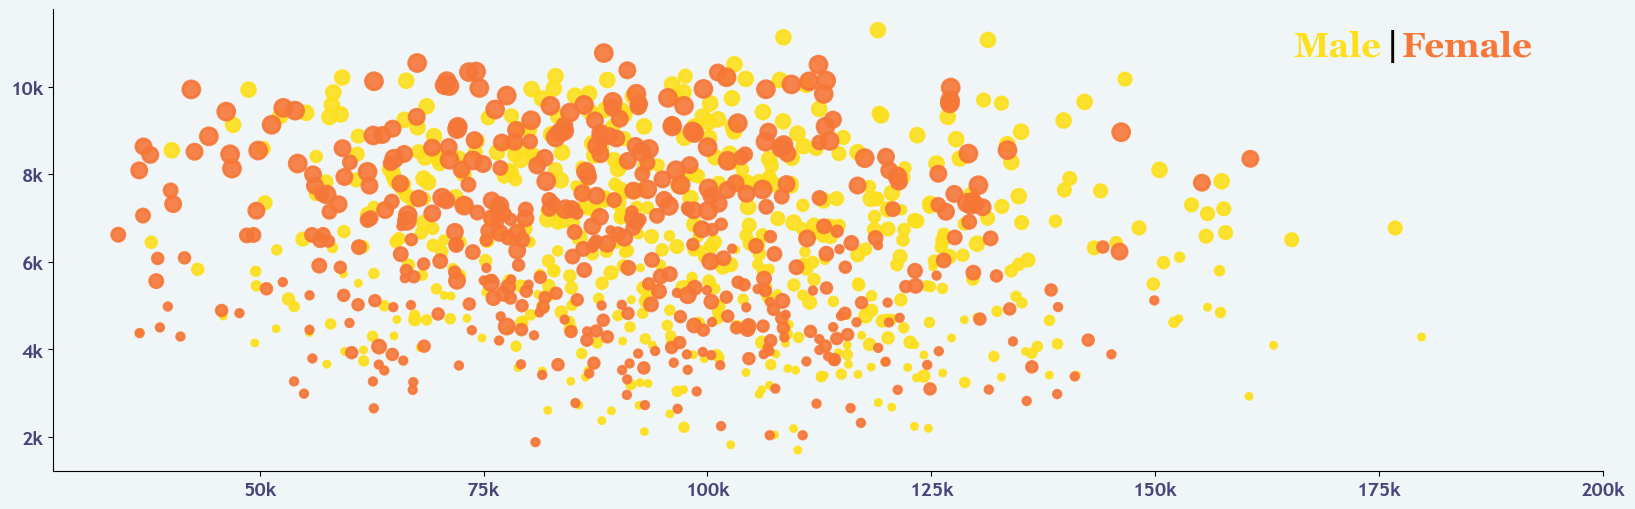

In [84]:
fig, ax = plt.subplots(figsize=(20, 6),facecolor=facecolor[0])
ax.patch.set_facecolor(facecolor[0])
ax.spines[['top', 'right']].set_visible(False)

male = df[df['Gender'] == 'Male']
ax.scatter(x=male['BasePay'],y=male['Bonus'],s=male['PerfEval'] * 20,c=colors1[0],edgecolors=colors1[0],alpha=0.9,linewidth=2,label='Male')
female = df[df['Gender'] == 'Female']
ax.scatter(x=female['BasePay'],y=female['Bonus'],s=female['PerfEval'] * 30,c=colors2[0],edgecolors=colors2[0],alpha=0.9,linewidth=2,label='Female')
add_title1(ax=ax, fontsize=25, x_vals=[0.8,0.86, 0.87], y=0.9,labels=["Male", "|", "Female"],colors=[colors1[0], "black", colors2[0]])
ax.set_yticks([2000, 4000, 6000, 8000, 10000])
ax.set_yticklabels(["2k", "4k", "6k", "8k", "10k"],fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':14})
ax.set_xticks([50000, 75000, 100000, 125000, 150000, 175000,200000])
ax.set_xticklabels(["50k", "75k", "100k", "125k", "150k", "175k","200k"],fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':14})
plt.legend().remove()
plt.show()


🔍 General Observations
Positive correlation between Base Pay and Bonus:
Bonus generally increases with higher base pay, forming an upward-trending cloud for both genders.

Performance evaluation positively influences bonus:
Larger dots (higher PerfEval) tend to cluster in the upper regions of bonus, confirming that better performance is rewarded with higher bonuses.

Bonuses cluster between $6k–$9k for most employees:
Regardless of gender, the densest band of points falls in this bonus range, indicating a central reward zone.

🟩 Male Employee Patterns
Wider spread across all salary ranges:
Male employees are more evenly distributed across the entire base pay spectrum, up to $200k.

High-performers (larger dots) visible across salary levels:
Top-rated male performers are not restricted to high pay — they exist even at $50k–$100k levels.

Fewer males in low-bonus regions:
Compared to females, males show a slightly higher concentration in mid-to-upper bonus levels.

🟫 Female Employee Patterns
Clustered around median base pay ($75k–$125k):
Female dots show denser clustering in this middle pay range, indicating less variation in base compensation.

Bonus distribution is similar but slightly denser at mid-bonus range:
Majority of female employees receive bonuses in the $6k–$8k range, regardless of base pay.

High performers (large dots) are visibly rewarded:
Just like males, large brown dots trend toward the top of the chart, validating performance-based bonus reward fairness.

📌 Key Takeaways
Performance Evaluation (dot size) is positively associated with higher bonuses for both genders, demonstrating fair reward mechanisms.

No clear gender bias in bonus distribution is visible — both males and females with high base pay and high performance are well-rewarded.

Slight base pay skew toward males is noticeable, as their dots extend more into the $150k–$200k zone.

Bonus values appear equitable across genders when normalized for base pay and performance.



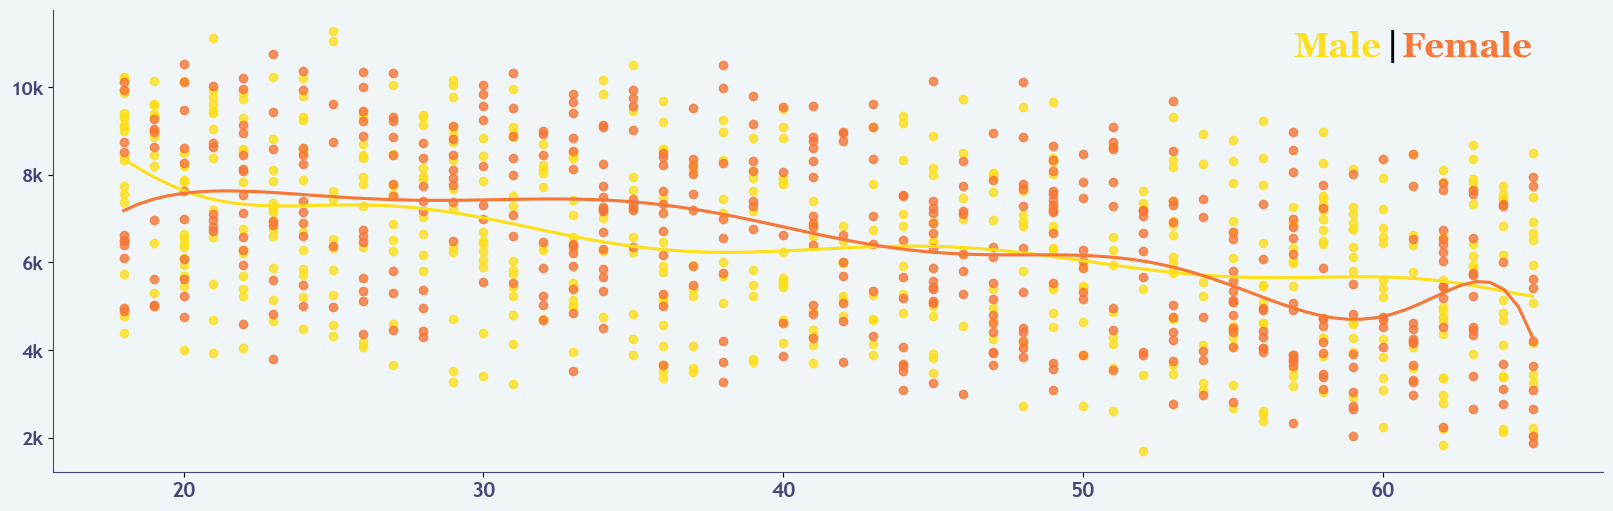

In [85]:
fig, ax = plt.subplots(figsize=(20, 6), facecolor=facecolor[0])
ax.patch.set_facecolor(facecolor[0])
for gender, color in zip(['Male', 'Female'], [colors1[0], colors2[0]]):
    sns.regplot(data=df[df['Gender'] == gender],x='Age',y='Bonus',ax=ax,scatter=True,label=gender,color=color,ci=None,order=10)
ax.set_yticks([2000, 4000, 6000, 8000, 10000])
ax.set_yticklabels(["2k", "4k", "6k", "8k", "10k"],fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':14})
ax.set_xticklabels(ax.get_xticklabels(),fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':15})
ax.set_ylabel("")
ax.set_xlabel("")
add_title1(ax=ax, fontsize=25, x_vals=[0.8,0.86, 0.87], y=0.9,labels=["Male", "|", "Female"],colors=[colors1[0], "black", colors2[0]])
ax.legend().remove()
set_spines_color1(ax, accent[1])
ax.spines[['top', 'right']].set_visible(False)
plt.show()


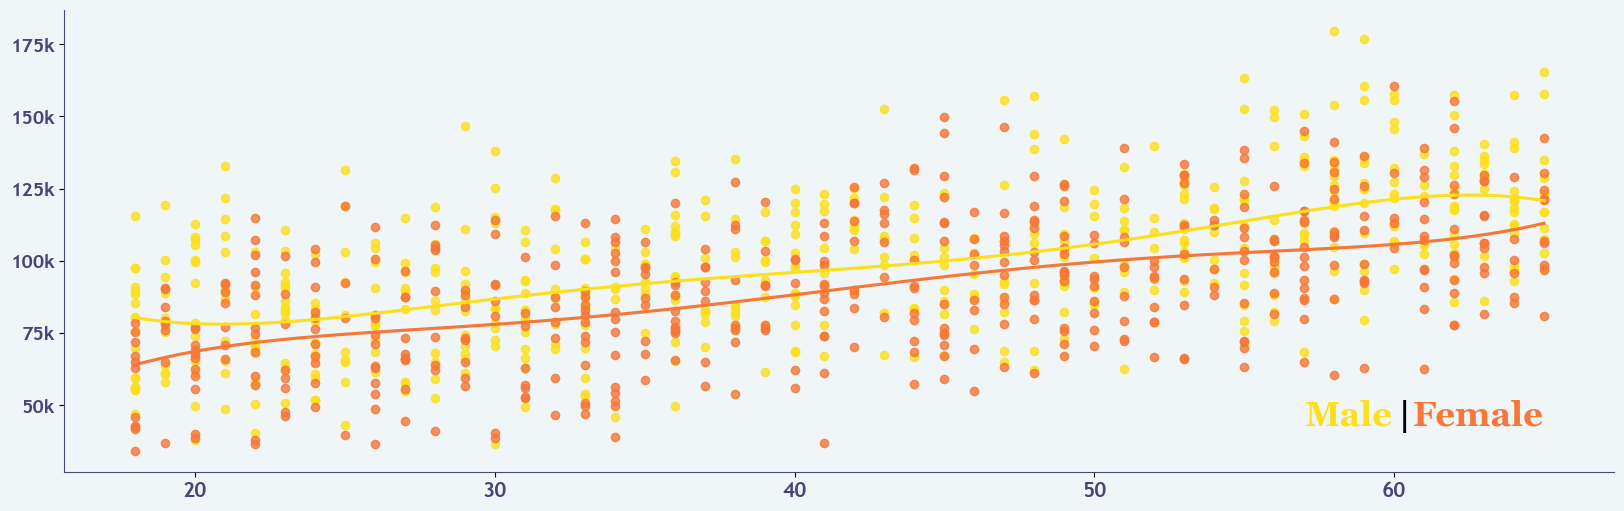

In [86]:
fig, ax = plt.subplots(figsize=(20, 6), facecolor=facecolor[0])
ax.patch.set_facecolor(facecolor[0])
for gender, color in zip(['Male', 'Female'], [colors1[0], colors2[0]]):
    sns.regplot(data=df[df['Gender'] == gender],x='Age',y='BasePay',ax=ax,scatter=True,label=gender,color=color,ci=None,order=5)
ax.set_yticks([50000, 75000, 100000, 125000, 150000, 175000])
ax.set_yticklabels(["50k", "75k", "100k", "125k", "150k", "175k"],fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':14})
ax.set_xticklabels(ax.get_xticklabels(),fontdict={'font': fonts[0], 'weight': 'bold','color':accent[1],'fontsize':15})
ax.set_ylabel("")
ax.set_xlabel("")
add_title1(ax=ax, fontsize=25, x_vals=[0.8,0.86, 0.87], y=0.1,labels=["Male", "|", "Female"],colors=[colors1[0], "black", colors2[0]])
ax.legend().remove()
set_spines_color1(ax, accent[1])
ax.spines[['top', 'right']].set_visible(False)
plt.show()
